In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Analysis of Application_Data 

In [2]:
#Loading the application_data.csv
application_data = pd.read_csv("application_data.csv")
pd.set_option('display.max_columns', 500)
application_data.shape
#application_data.head()

(307511, 122)

#### Identifying Null Values

In [3]:
#Checking for any duplicate rows
sum(application_data.duplicated()) == 0

True

In [4]:
#Check for missing values
print (application_data.isnull().sum())  
print (application_data.isnull().values.any())
print (application_data.isnull().values.sum())

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [8]:
#filtering out the unnecessary columns from the dataframe
required_cols = ['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','FLAG_MOBIL','FLAG_EMP_PHONE','OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','ORGANIZATION_TYPE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
application_data = application_data.loc[:,required_cols]

#Checking the number of rows and columns again
application_data.shape

(307511, 37)

In [9]:
#Check % of null values column wise
application_data.isnull().sum()*100/application_data.shape[0]

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                    65.990810
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
OCCUPATION_TYPE 

#### Treating Missing Values

In [10]:
#Remove column which has almost 65% null values
application_data = application_data.drop('OWN_CAR_AGE', axis=1)

###### Column 'Occupation_Type' has around 31% missing values, but then it is not possible to figure out somebody's occupation. So, it is better to leave it as it is.
###### 6 columns have 13.5% missing values and when we look at it, it has numeric values but then each number indicates the number of calls made like 0,1,2 etc. So, it is not a good idea to impute the missing values with mean. But, we can replace the missing value with the mode which would be the value with highest frequency.

In [11]:
#Column: AMT_REQ_CREDIT_BUREAU_HOUR
cols_toimpute = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
for col in cols_toimpute:
    #First, converting it to type category.
    application_data[col] = application_data[col].astype('category')
    #Calculating the frequency of each category
    freq_val = int(application_data[col].value_counts().idxmax())
    #Replacing Nan with freq_val
    application_data.loc[pd.isnull(application_data[col]),[col]] = freq_val

###### As is evident from the analysis above, there are some missing values in AMT_ANNUITY and AMT_GOODS_PRICE columns. Since we will be analysing these columns further, let us see if we can impute these with the mean of the other values as the mean would still remain the same after imputing the null values and also there is not much difference between the mean and the median.

In [12]:
application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  \
count      307511.000000    307511.000000  307511.000000   307511.000000   
mean        -4986.120328     -2994.202373       0.999997        0.819889   
std          3522.886321      1509.450419       0.001803        0.384280   
min        -24672.000000     -7197.000000       0.000000        0.000000   
25%         -7479.500000     -4299.000000       1.000000        1.000000   
50%         -4504.000000     -3254.000000       1.000000        1.000000   
75%         -2010.000000     -1720.000000       1.000000        1.000000   
max             0.000000         0.000000       1.000000        1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307509.000000         307511.000000                307511.000000   
mean          2.152665              2.052463                     2.031521   
std           0.910682              0.509034                     0.502737   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  
count            307511.000000  
mean                 12.063419  
std                   3.265832  
min                   0.000000  
25%                  10.000000  
50%                  12.000000  
75%                  14.000000  
max                  23.000000

In [13]:
#Imputing AMT_ANNUITY and AMT_GOODS_PRICE null values with respective mean values
cols_impute_with_mean = ['AMT_ANNUITY','AMT_GOODS_PRICE']

for col in cols_impute_with_mean:
    application_data.loc[pd.isnull(application_data[col]),[col]] = application_data[col].mean()

In [14]:
#Check % of null values column wise again
application_data.isnull().sum()*100/application_data.shape[0]

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.000000
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS 

In [15]:
#Standardising columns 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH' as they 
#have negative values.
application_data['DAYS_BIRTH'] = np.where(application_data['DAYS_BIRTH']<0,-1*application_data['DAYS_BIRTH'],application_data['DAYS_BIRTH'])

application_data['DAYS_EMPLOYED'] = np.where(application_data['DAYS_EMPLOYED']<0,-1*application_data['DAYS_EMPLOYED'],application_data['DAYS_EMPLOYED'])

application_data['DAYS_REGISTRATION'] = np.where(application_data['DAYS_REGISTRATION']<0,-1*application_data['DAYS_REGISTRATION'],application_data['DAYS_REGISTRATION'])

application_data['DAYS_ID_PUBLISH'] = np.where(application_data['DAYS_ID_PUBLISH']<0,-1*application_data['DAYS_ID_PUBLISH'],application_data['DAYS_ID_PUBLISH'])

In [17]:
#Checking the column datatypes again to decide if we need to convert any column or not
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 36 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307511 non-null float64
AMT_GOODS_PRICE                307511 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

In [20]:
#Checking data-types of all columns and converting if required.
#Converting the Target variable to category.
#Converting the rating and flag columns to category as well.
cols_tocatg = ['TARGET','FLAG_MOBIL','FLAG_EMP_PHONE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']
for col in cols_tocatg:
    application_data[col] = application_data[col].astype('category')

#Converting column CNT_FAM_MEMBERS to int
application_data.loc[pd.isnull(application_data['CNT_FAM_MEMBERS']),['CNT_FAM_MEMBERS']] = 0
application_data['CNT_FAM_MEMBERS'] = application_data['CNT_FAM_MEMBERS'].astype(int)

In [21]:
#Checking the data-types again
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 36 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null category
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307511 non-null float64
AMT_GOODS_PRICE                307511 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_REL

In [22]:
#Numeric datatypes
numeric_cols = application_data.select_dtypes([np.number]).columns

#Categorical columns
categ_cols = application_data.select_dtypes(include=['object','category']).columns

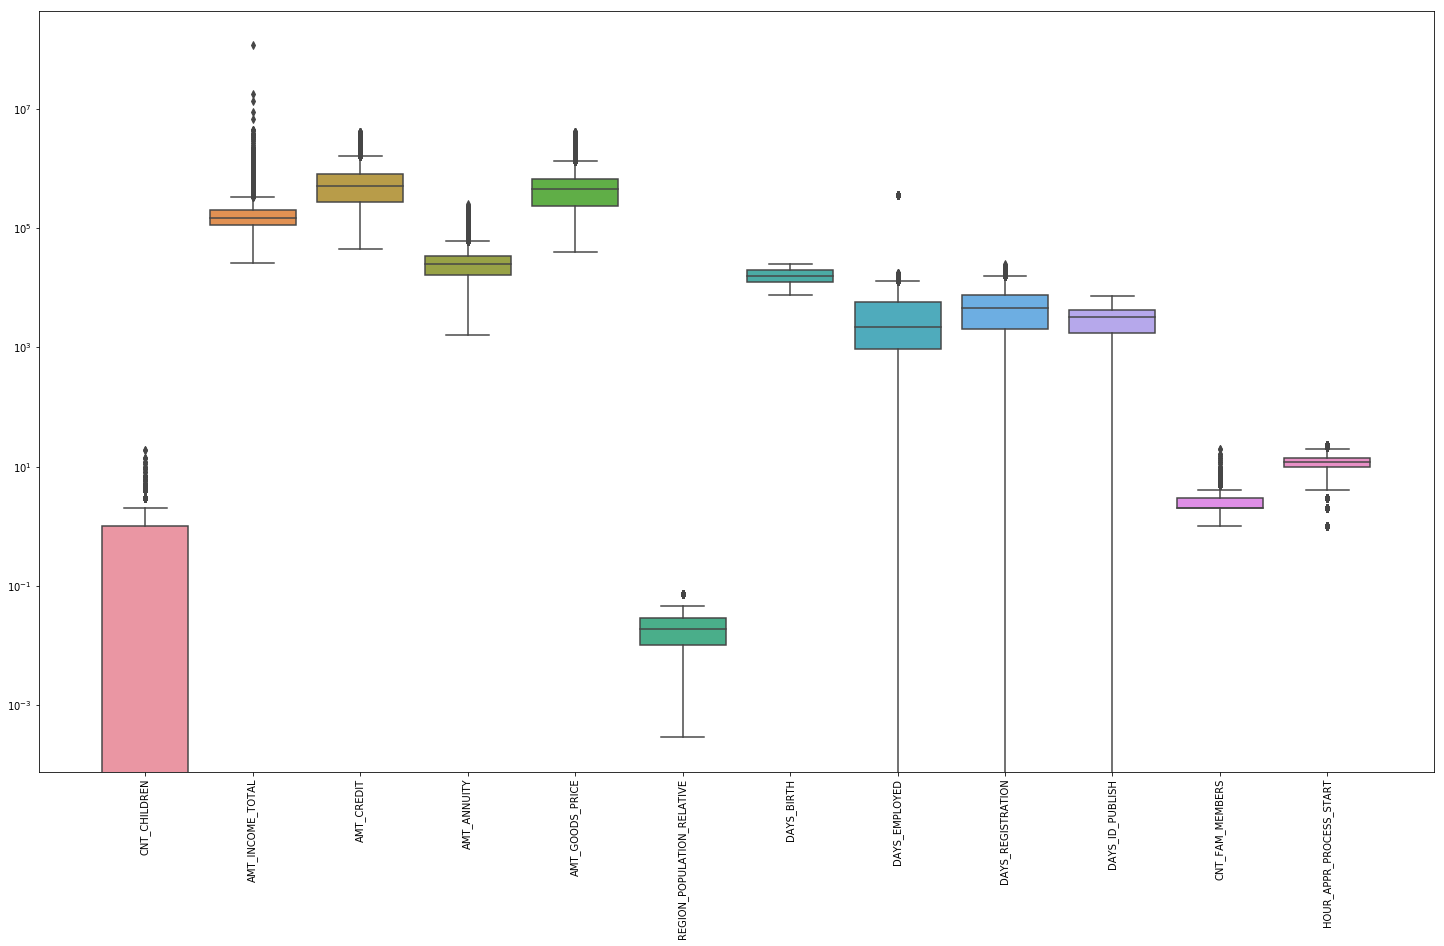

In [23]:
#Outlier detection-- Box plot for quantitative variables
quant_cols = numeric_cols.tolist().copy()
quant_cols.remove('SK_ID_CURR')
plt.figure(figsize=(25,14))
sns.boxplot(data=application_data.loc[:,quant_cols])
plt.yscale('log')
plt.xticks(rotation='vertical')
plt.autoscale('True')
plt.show()

###### From the above boxplots, we can clearly see that few variables have outliers. Let us consider variables with high outliers and see if we can treat them.
###### * AMT_INCOME_TOTAL
###### * AMT_CREDIT
###### * AMT_ANNUITY
###### * AMT_GOODS_PRICE

##### We will try capping outlier values which are above 95% and below 5% in the above mentioned columns. 
##### CNT_CHILDREN and CNT_FAM_MEMBERS have outlier values but capping them is not going to make much of a difference as the frequency of such values is less like there are only 2 rows with CNT_CHILDREN with value 19 which looks like an outlier.

In [24]:
outlier_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

In [26]:
#Capping the outlier values which are above 95% with the value at 95% and values below 5% with value at
#5%
for col in outlier_cols:
    percentiles = application_data[col].quantile([0.05,0.95]).values
    application_data.loc[application_data[col] <= percentiles[0],col] = percentiles[0]
    application_data.loc[application_data[col] >= percentiles[1],col] = percentiles[1]

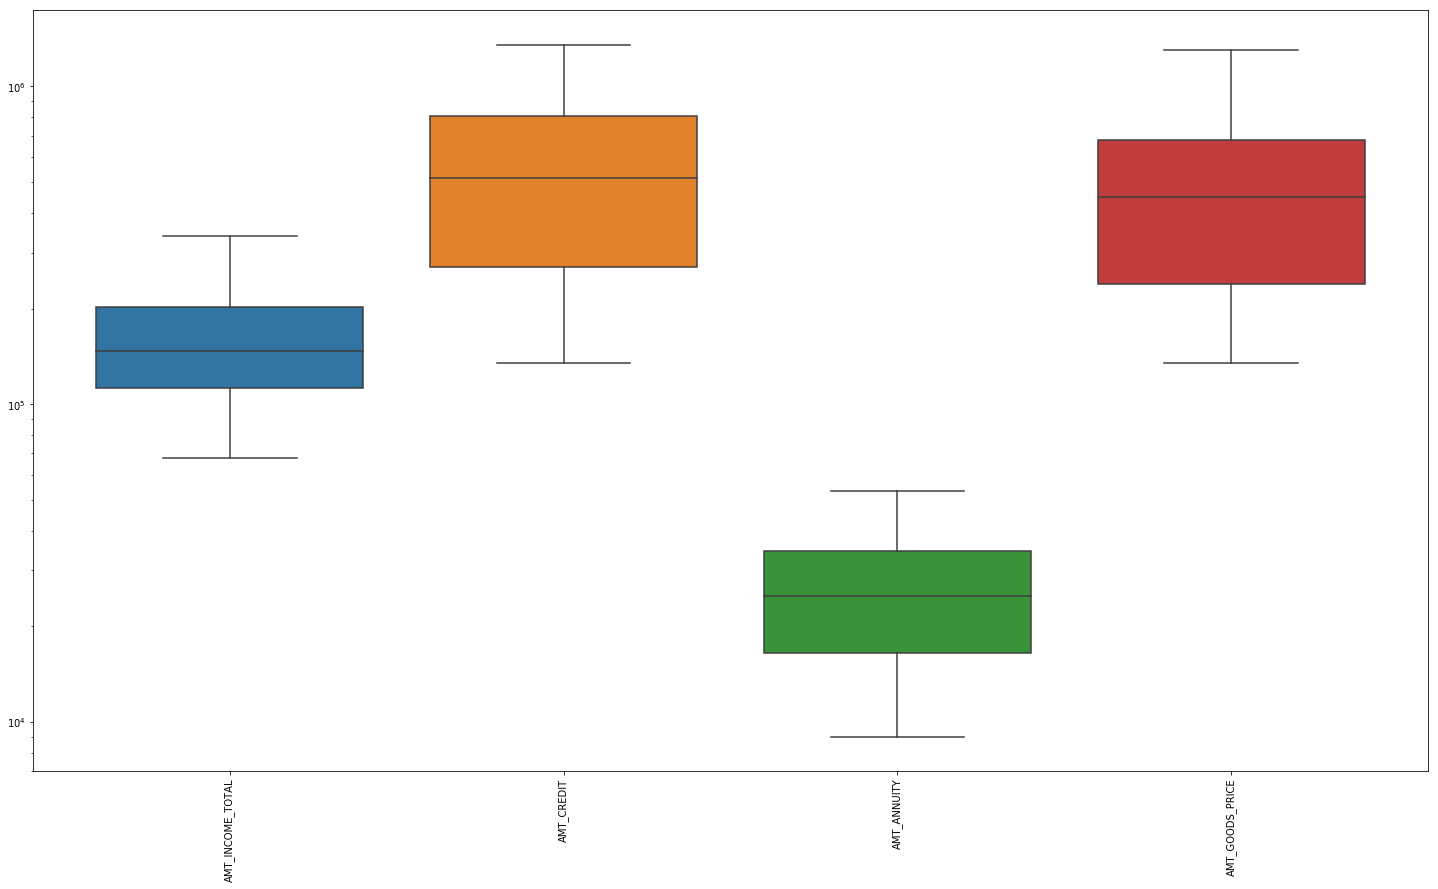

In [27]:
#Checking outliers again for columns which had outliers-- Box plot for quantitative variables
plt.figure(figsize=(25,14))
sns.boxplot(data=application_data.loc[:,outlier_cols])
plt.yscale('log')
plt.xticks(rotation='vertical')
plt.autoscale('True')
plt.show()

In [28]:
#Creating AGE COLUMN
application_data['AGE'] = (application_data['DAYS_BIRTH']/365).apply(np.floor)
application_data['AGE'] = application_data['AGE'].astype(int)

In [29]:
#Binning of AGE column
bin_width = int((max(application_data['AGE']) - min(application_data['AGE']))/3)
bins = range(int(min(application_data['AGE'])),int(max(application_data['AGE'])),bin_width)
application_data['AGE-BINNED'] = pd.cut(application_data['AGE'],bins, labels=['Young','Middle-age','Senior'])

In [31]:
#Binning of AMT_INCOME_TOTAL column
bin_width = int((max(application_data['AMT_INCOME_TOTAL']) - min(application_data['AMT_INCOME_TOTAL']))/4)
bins = range(int(min(application_data['AMT_INCOME_TOTAL'])),int(max(application_data['AMT_INCOME_TOTAL'])),bin_width)
application_data['INCOME-BINNED'] = pd.cut(application_data['AMT_INCOME_TOTAL'],bins,labels=['Low','Medium','High'])

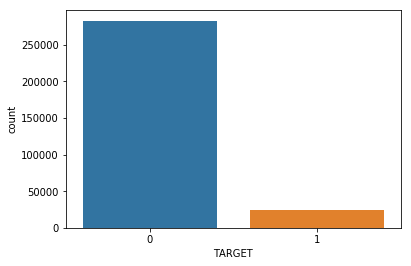

In [32]:
#Checking the imbalance in data
sns.countplot('TARGET',data=application_data)
plt.show()

###### So, we can clearly see from the above plot that the data is highly imbalanced. Let us check the imbalance in terms of percentage

In [33]:
defaulters_count = len(application_data[application_data['TARGET'] == 1])
other_cases_count = len(application_data[application_data['TARGET'] == 0])

defaulters_percentage = (defaulters_count/len(application_data['TARGET'])) * 100
other_cases_percentage = (other_cases_count/len(application_data['TARGET'])) * 100
print("Defaulters%",defaulters_percentage)
print("OtherCases%",other_cases_percentage)

Defaulters% 8.072881945686495
OtherCases% 91.92711805431351


###### So, the percentage of people who have payment difficulties is 8.07% which is way less than the other cases percentage of 91.92% which confirms that the data is highly imbalanced.

In [34]:
#Splitting data into two based on 1 and 0 value in the TARGET column
target_1df = application_data[application_data['TARGET'] == 1]
target_0df = application_data[application_data['TARGET'] == 0]

In [36]:
#Removing the TARGET column from the list of categorical columns to be analysed
univanalysis_categ_cols = categ_cols.tolist().copy()
univanalysis_categ_cols.remove('TARGET')

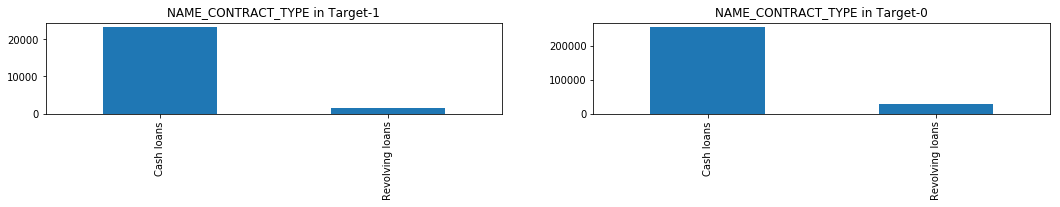

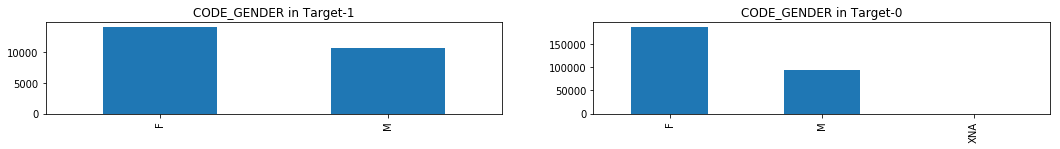

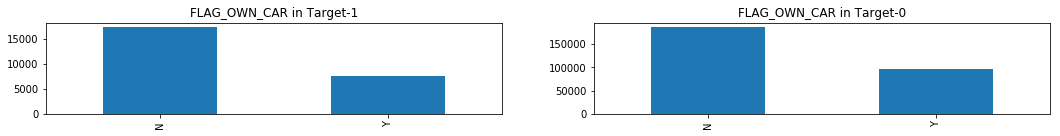

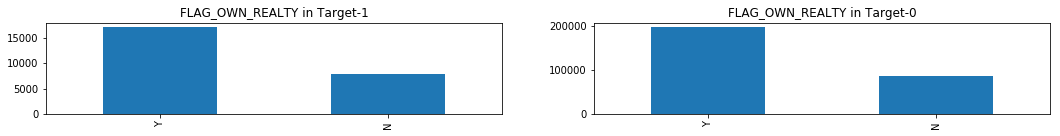

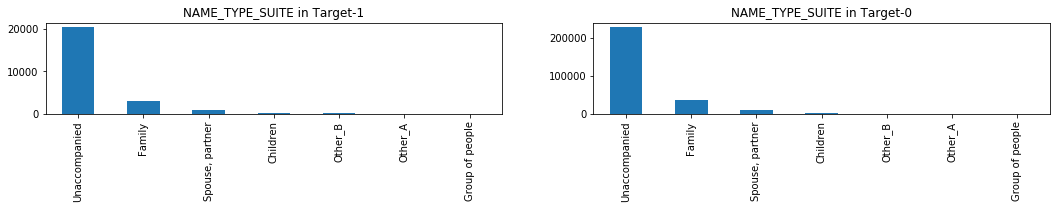

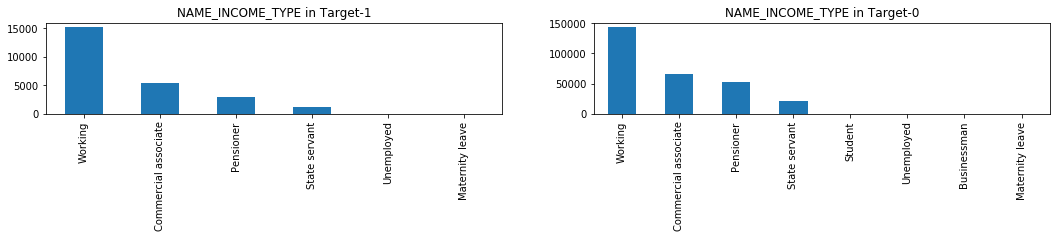

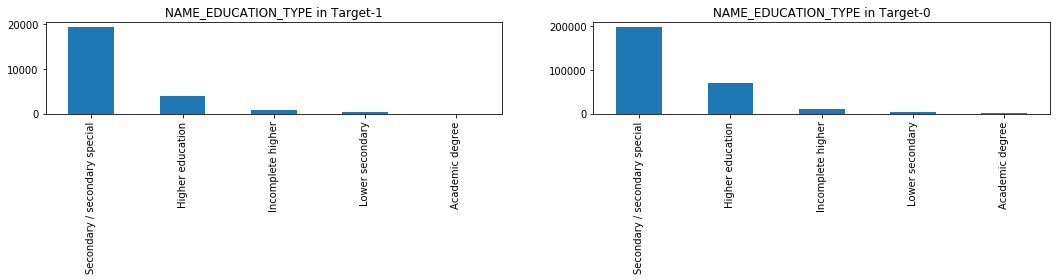

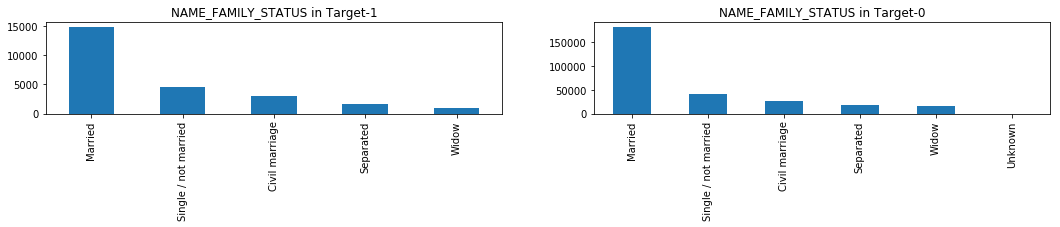

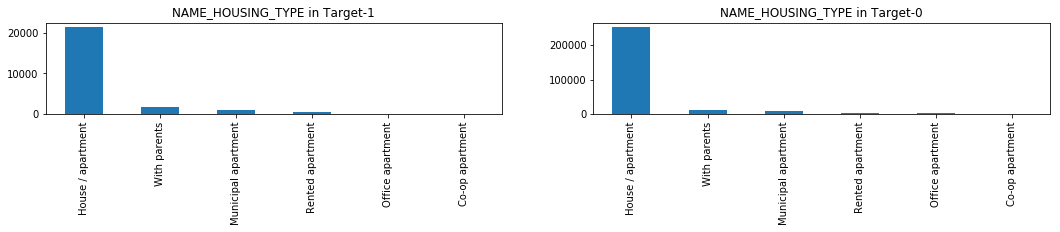

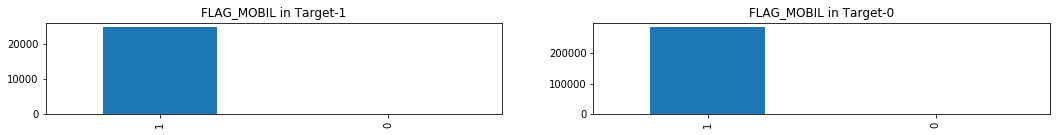

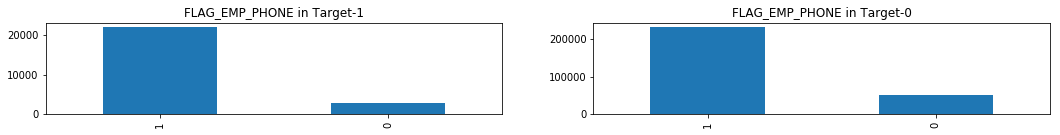

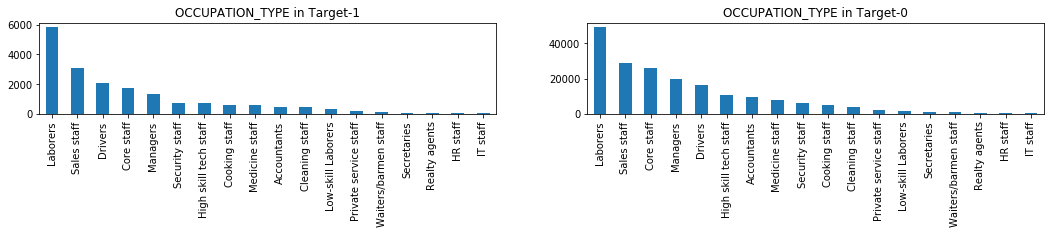

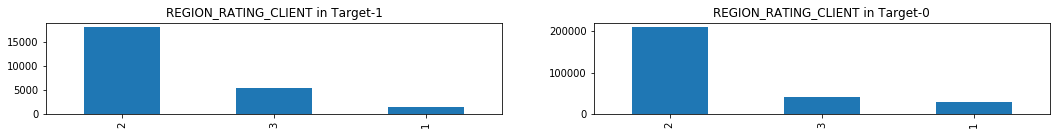

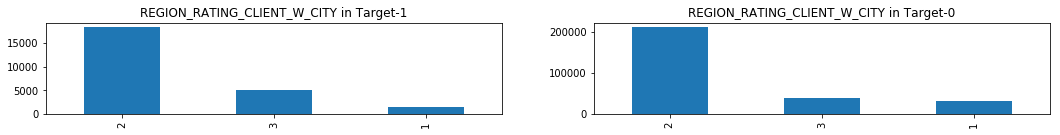

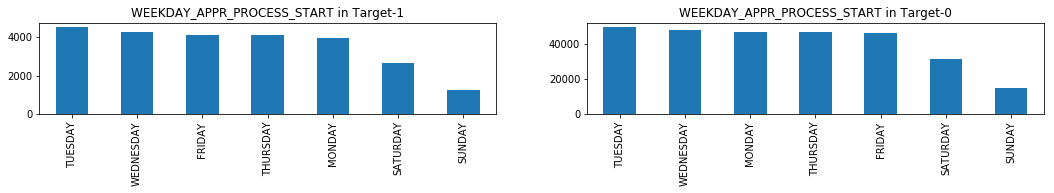

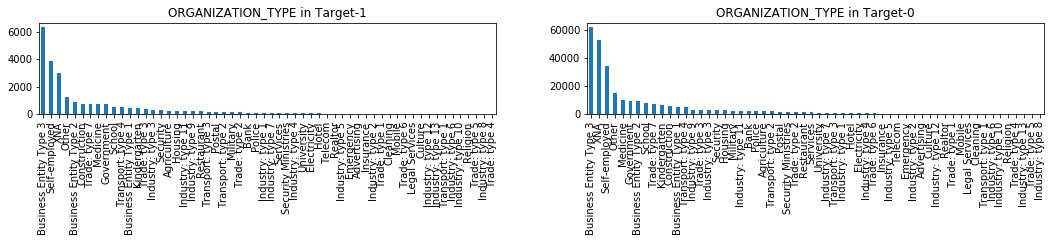

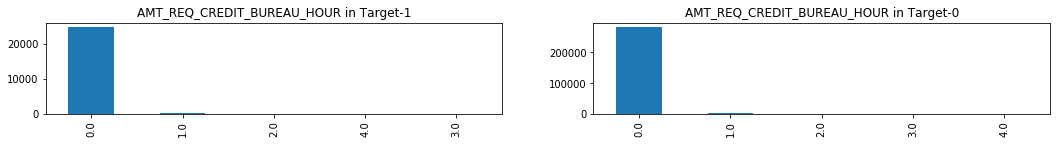

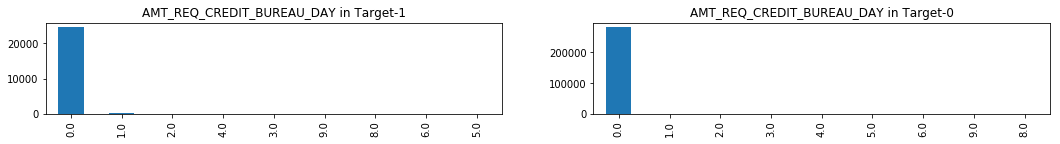

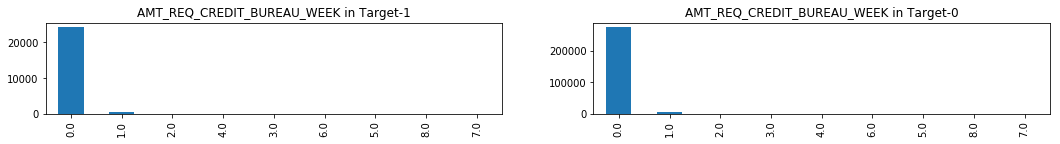

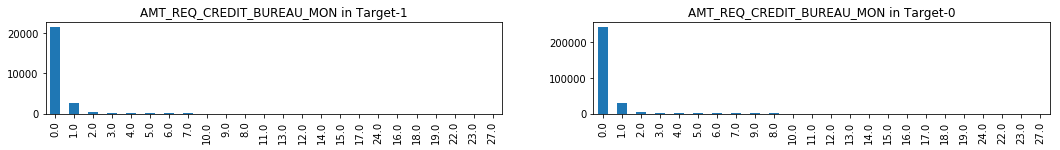

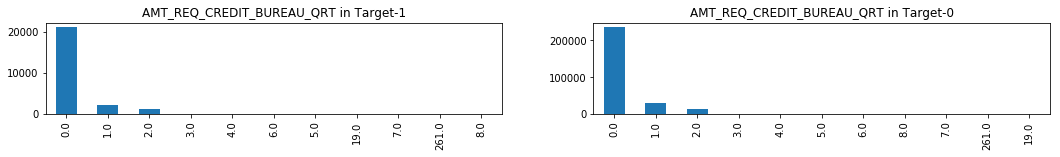

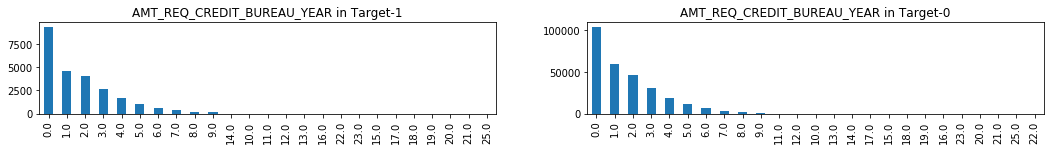

In [38]:
pos1=1
pos2=1
i=1
for col in univanalysis_categ_cols:
    plt.figure(i,figsize=(18,44))
    plt.subplot(22,2,pos1)
    target_1df[col].value_counts().plot.bar(title='{} in Target-1'.format(col))
    pos2=pos1+1
    plt.subplot(22,2,pos2)
    target_0df[col].value_counts().plot.bar(title='{} in Target-0'.format(col))
    pos1+=2
    i+=1
    plt.show()
#fig.tight_layout()

##### Inference from the above graphs
###### Column: NAME_CONTRACT_TYPE
###### Here, the frequency of cash loans is more in both target-1 and target-0.This does not look like a driver variable.
###### Column: CODE_GENDER
###### Here, the frequency of females is more in both target-1 and target-0. So, this is not differentiating amongst the two.
###### Column: FLAG_OWN_CAR
###### Here, the frequency of people who own a car is more in both target-1 and target-0.
###### Column: FLAG_OWN_REALTY
###### Here, the frequency of people who own a house is more in both target-1 and target-0.
###### Column: NAME_INCOME_TYPE
###### Here, the frequency of working professionals is more in both target-1 and target-0.
###### Column: NAME_EDUCATION_TYPE
###### Here, the frequency of people who have Secondary/Secondary special is more in both target-1 and target-0.
###### Column: NAME_FAMILY_STATUS
###### Here, the frequency of people who are Married is more in both target-1 and target-0.
###### Column: NAME_HOUSING_TYPE
###### Here, the frequency of people who live in Apartment is more in both target-1 and target-0.
###### Column: OCCUPATION_TYPE
###### Here, there is slight difference between the two groups but, the topmost and bottom-most are same.
###### Column: REGION_RATING_CLIENT
###### Here, the frequency of people who live in region rated 2 is more in both target-1 and target-0.
###### Columns: AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR
###### The above columns have the same frequency distribution and hence not providing any valuable insight.

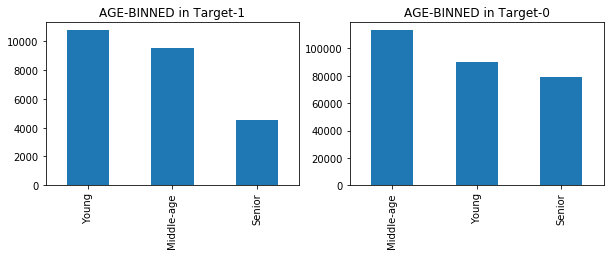

In [39]:
#Column: AGE-BINNED
plt.figure(figsize=(10,3))
plt.subplot(121)
target_1df['AGE-BINNED'].value_counts().plot.bar(title='AGE-BINNED in Target-1')
plt.subplot(122)
target_0df['AGE-BINNED'].value_counts().plot.bar(title='AGE-BINNED in Target-0')

###### Here, we can see that more number of youngsters have payment difficulties (target-1) and in all other cases i.e. target-0, the frequency of senior citizens is more which means senior citizens have been making all payments on time

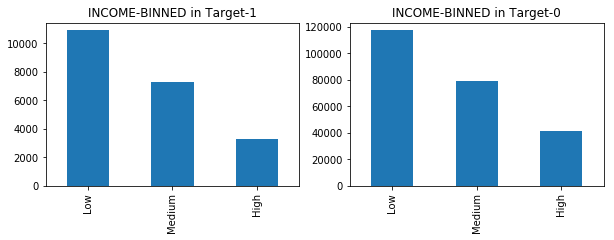

In [40]:
#Column: INCOME-BINNED
plt.figure(figsize=(10,3))
plt.subplot(121)
target_1df['INCOME-BINNED'].value_counts().plot.bar(title='INCOME-BINNED in Target-1')
plt.subplot(122)
target_0df['INCOME-BINNED'].value_counts().plot.bar(title='INCOME-BINNED in Target-0')


###### It is quite evident from the above bar graph that Low income people have more payment difficulties when compared to Medium and High income people. Also, if we look at the y-axis, the income of people who make payment on time(target=0) is comparatively more than people who have payment difficulties(target=1)

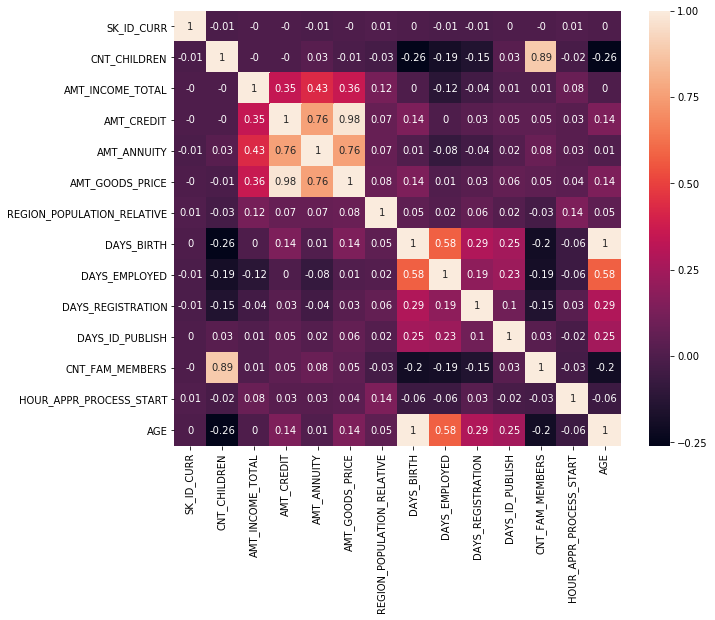

In [41]:
#Correlation of numeric columns for target=1.
plt.figure(figsize=(10,8))
corr = round(target_1df.corr(),2)
sns.heatmap(corr,annot=True)

###### Here, we can observe corelation between the following variables
###### * AMT_CREDIT & AMT_GOODS_PRICE  (0.98)
###### * AMT_CREDIT & AMT_ANNUITY (0.76)
###### * CNT_FAM_MEMBERS & CNT_CHILDREN (0.87)
###### * DAYS_BIRTH & DAYS_EMPLOYED (0.58)
###### There is no surprise in the corelation of 1 between AGE and DAYS_BIRTH as AGE was derived from DAYS_BIRTH column

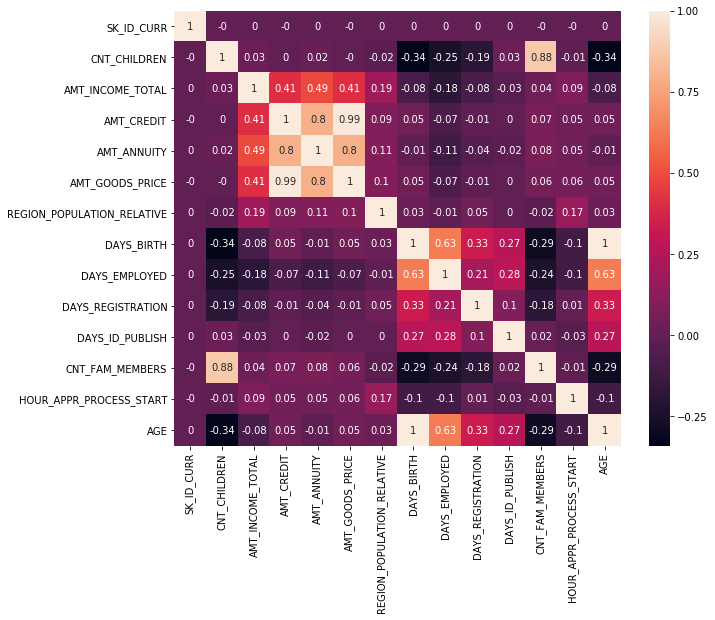

In [42]:
#Correlation of numeric columns for both target-0.
plt.figure(figsize=(10,8))
corr = round(target_0df.corr(),2)
sns.heatmap(corr,annot=True)

###### Here, we can observe correlation between the following variables which is quite similar to what we observed in the previous case
###### * AMT_CREDIT & AMT_GOODS_PRICE  (0.99)
###### * AMT_CREDIT & AMT_ANNUITY (0.8)
###### * CNT_FAM_MEMBERS & CNT_CHILDREN (0.87)
###### * DAYS_BIRTH & DAYS_EMPLOYED (0.63)

In [43]:
application_data[quant_cols].info()
application_data['CNT_CHILDREN'] = application_data['CNT_CHILDREN'].astype(int)
application_data['CNT_FAM_MEMBERS'] = application_data['CNT_FAM_MEMBERS'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 12 columns):
CNT_CHILDREN                  307511 non-null int64
AMT_INCOME_TOTAL              307511 non-null float64
AMT_CREDIT                    307511 non-null float64
AMT_ANNUITY                   307511 non-null float64
AMT_GOODS_PRICE               307511 non-null float64
REGION_POPULATION_RELATIVE    307511 non-null float64
DAYS_BIRTH                    307511 non-null int64
DAYS_EMPLOYED                 307511 non-null int64
DAYS_REGISTRATION             307511 non-null float64
DAYS_ID_PUBLISH               307511 non-null int64
CNT_FAM_MEMBERS               307511 non-null int32
HOUR_APPR_PROCESS_START       307511 non-null int64
dtypes: float64(6), int32(1), int64(5)
memory usage: 27.0 MB


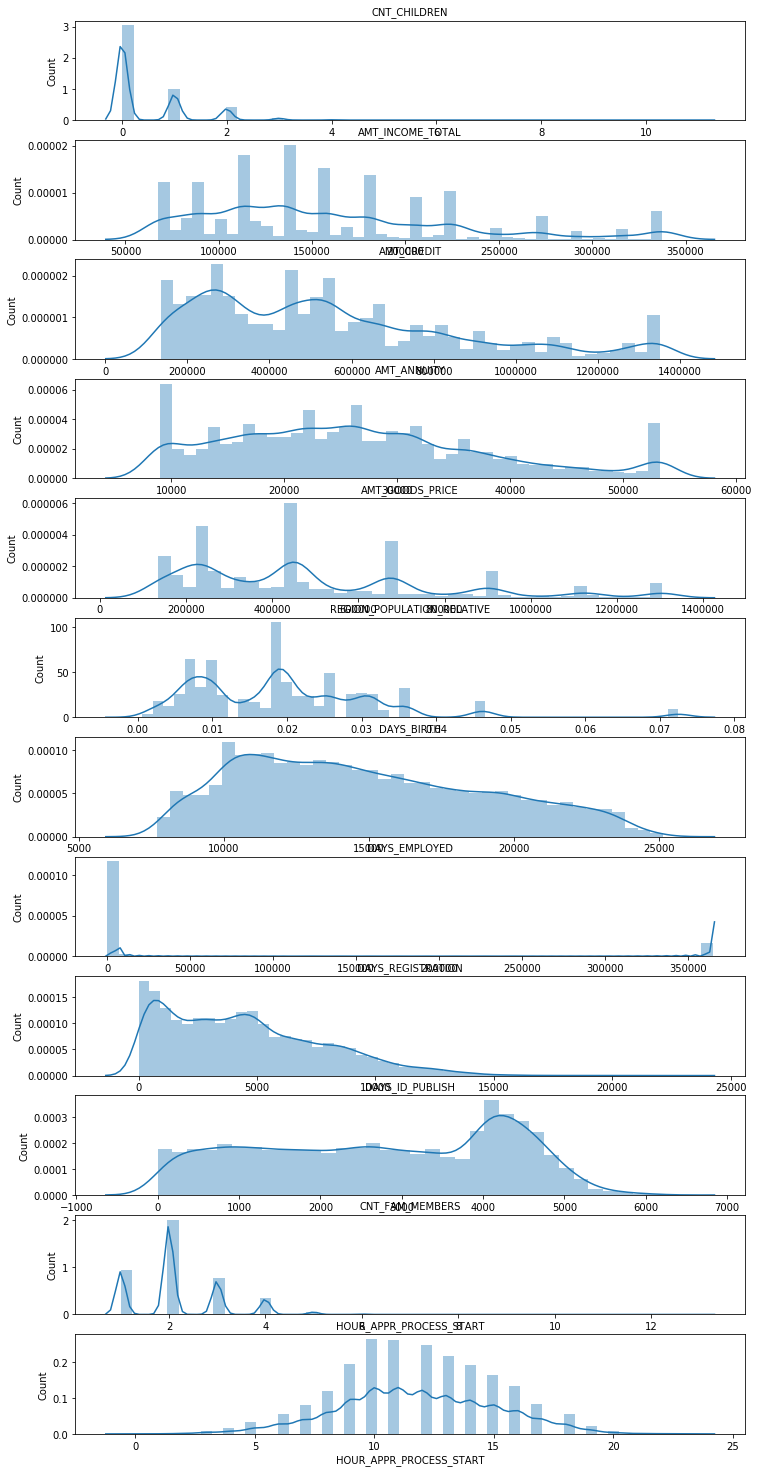

In [45]:
#Univariate Analysis for numerical variables for target=1
l = len(quant_cols)
fig, ax = plt.subplots(l,figsize=(12,26))
for n,col in enumerate(quant_cols):
    sns.distplot(target_1df[col],hist=True, ax=ax[n])
    ax[n].set_title(col,fontsize=10)
    ax[n].set_ylabel('Count')
plt.show()   

##### Inference from above histograms(target=1)
###### CNT_CHILDREN - The frequency is highest when CNT_CHILDREN is 0, for remaining all, it seems to be less. 
###### AMT_INCOME_TOTAL -  Frequency is more when the income is low.
###### AMT_CREDIT - Frequency is more for low or middle range credit amount
###### AMT_ANNUITY - More likely to default when the annuity amount is low.
###### AMT_GOODS_PRICE - Frequency is highest at price somewhere around 450000.
###### REGION_POPULATION_RELATIVE -  Frequency is more in regions where the population is more.
###### DAYS_BIRTH - Youngsters are more likely to default as the frequency is more there.
###### DAYS_EMPLOYED - Frequency is more when the DAYS_EMPLOYED is 0.
###### DAYS_REGISTRATION - Frequency decreases as the days of registration increases.
###### DAYS_ID_PUBLISH - Seems to be uniform till 4000, then there is a sudden increase in frequency and then it decreases gradually again.
###### CNT_FAM_MEMBERS - Frequency is more at CNT_FAM_MEMBERS=2
###### HOUR_APPR_PROCESS_START - looks like a normal distribution.

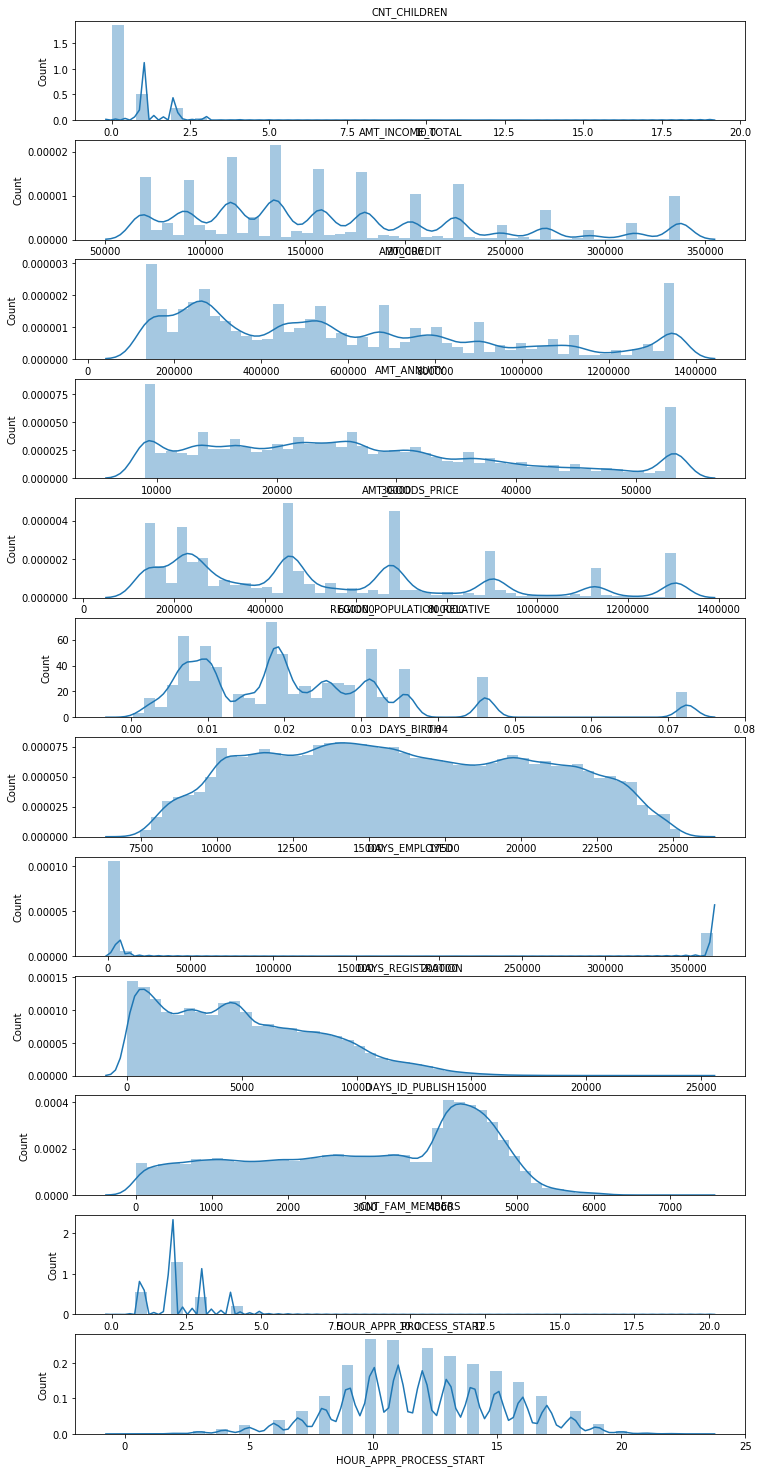

In [41]:
#Univariate Analysis for numerical variables for target-0
quant_l = len(quant_cols)
fig, ax = plt.subplots(quant_l,figsize=(12,26))

for n,col in enumerate(quant_cols):
    sns.distplot(target_0df[col],hist=True, ax=ax[n])
    ax[n].set_title(col,fontsize=10)
    #ax[n].set_xlabel(col,fontsize=8)
    ax[n].set_ylabel('Count')
plt.show()   

##### Inference from above histograms(target=0)
###### CNT_CHILDREN - The frequency is highest when CNT_CHILDREN is 0, for remaining all, it seems to be less. 
###### AMT_INCOME_TOTAL -  Frequency is more when the income is low.
###### AMT_CREDIT - Frequency is more for low or middle range credit amount
###### AMT_ANNUITY - Frequency is more  when the annuity amount is low.
###### AMT_GOODS_PRICE - Frequency is highest at price somewhere around 450000.
###### REGION_POPULATION_RELATIVE -  Frequency is more in regions where the population is more.
###### DAYS_BIRTH - Senior people tend to make payments without any delay.
###### DAYS_EMPLOYED - Frequency is more when the DAYS_EMPLOYED is 0.
###### DAYS_REGISTRATION - Frequency decreases as the days of registration increases.
###### DAYS_ID_PUBLISH - Seems to be uniform till 4000, then there is a sudden increase in frequency and then it decreases gradually again.
###### CNT_FAM_MEMBERS - Frequency is more at CNT_FAM_MEMBERS=2
###### HOUR_APPR_PROCESS_START - looks like a normal distribution.

#### Bivariate Analysis

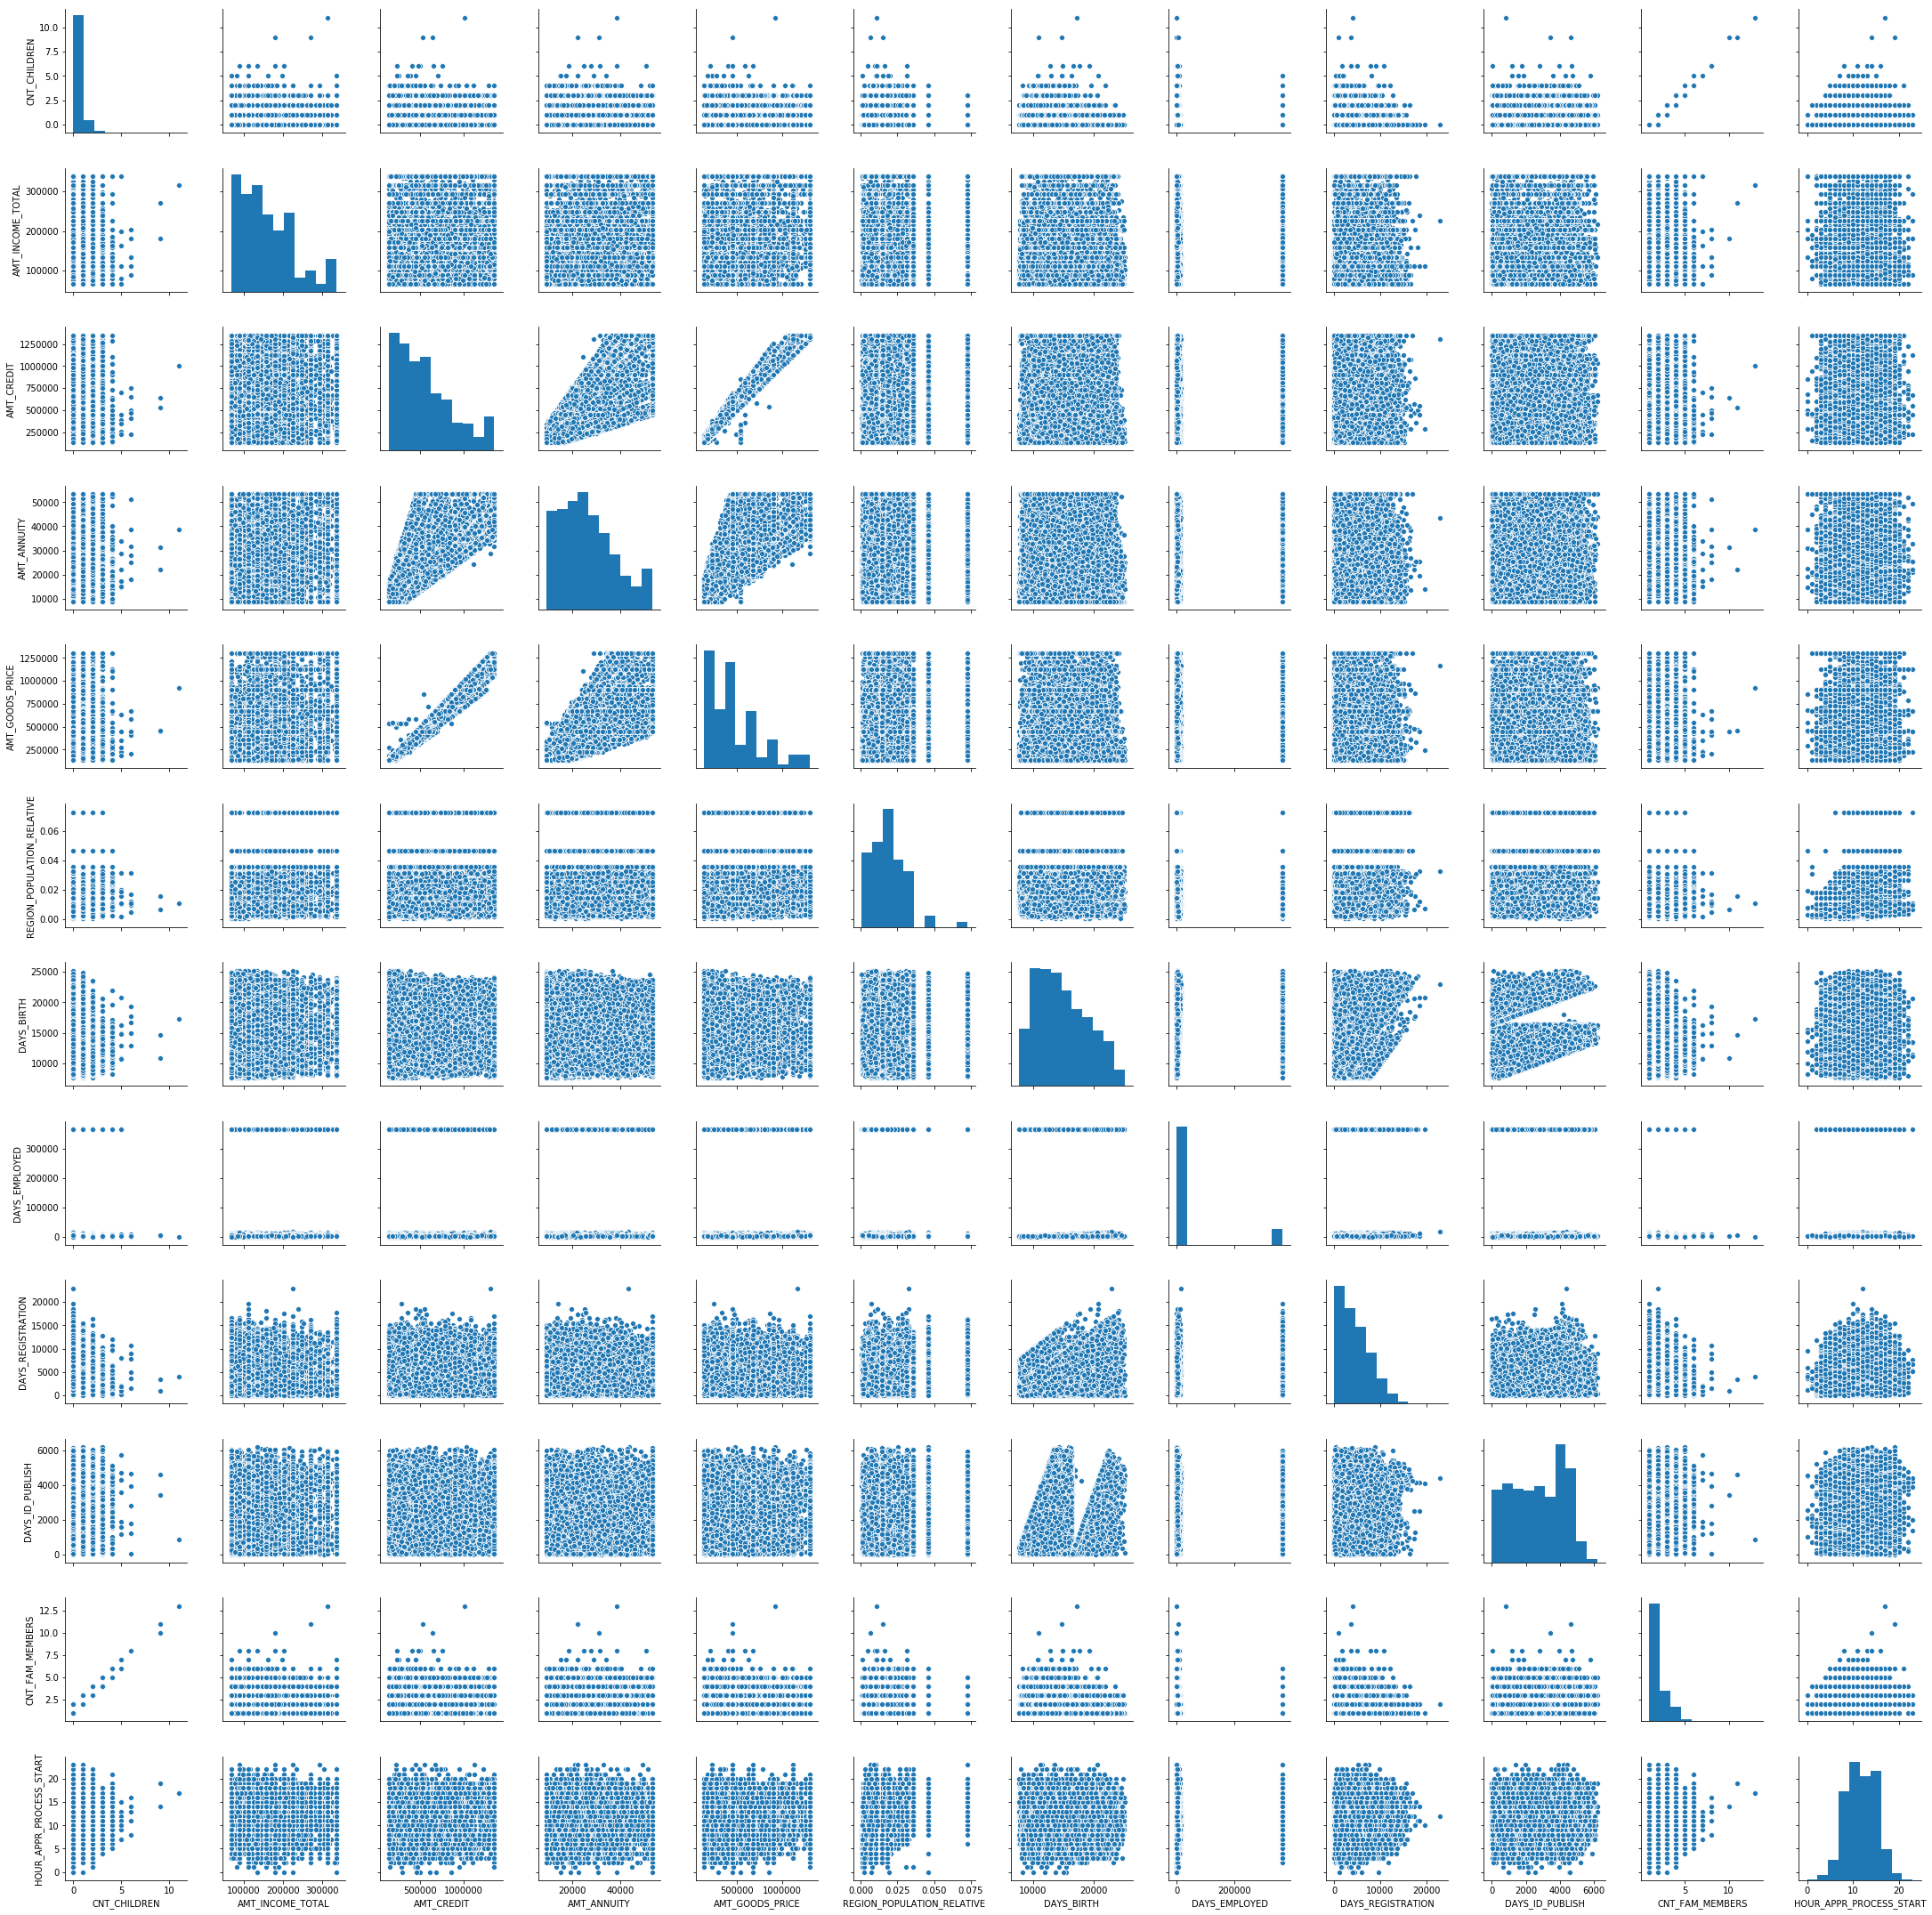

In [47]:
#Bivariate Analysis of target=1
sns.pairplot(target_1df[quant_cols])

###### We can see a linear trend only for the following columns
###### * AMT_CREDIT & AMT_ANNUITY
###### * AMT_ANNUITY & AMT_GOODS PRICE
###### * CNT_CHILDREN & CNT_FAM_MEMBERS

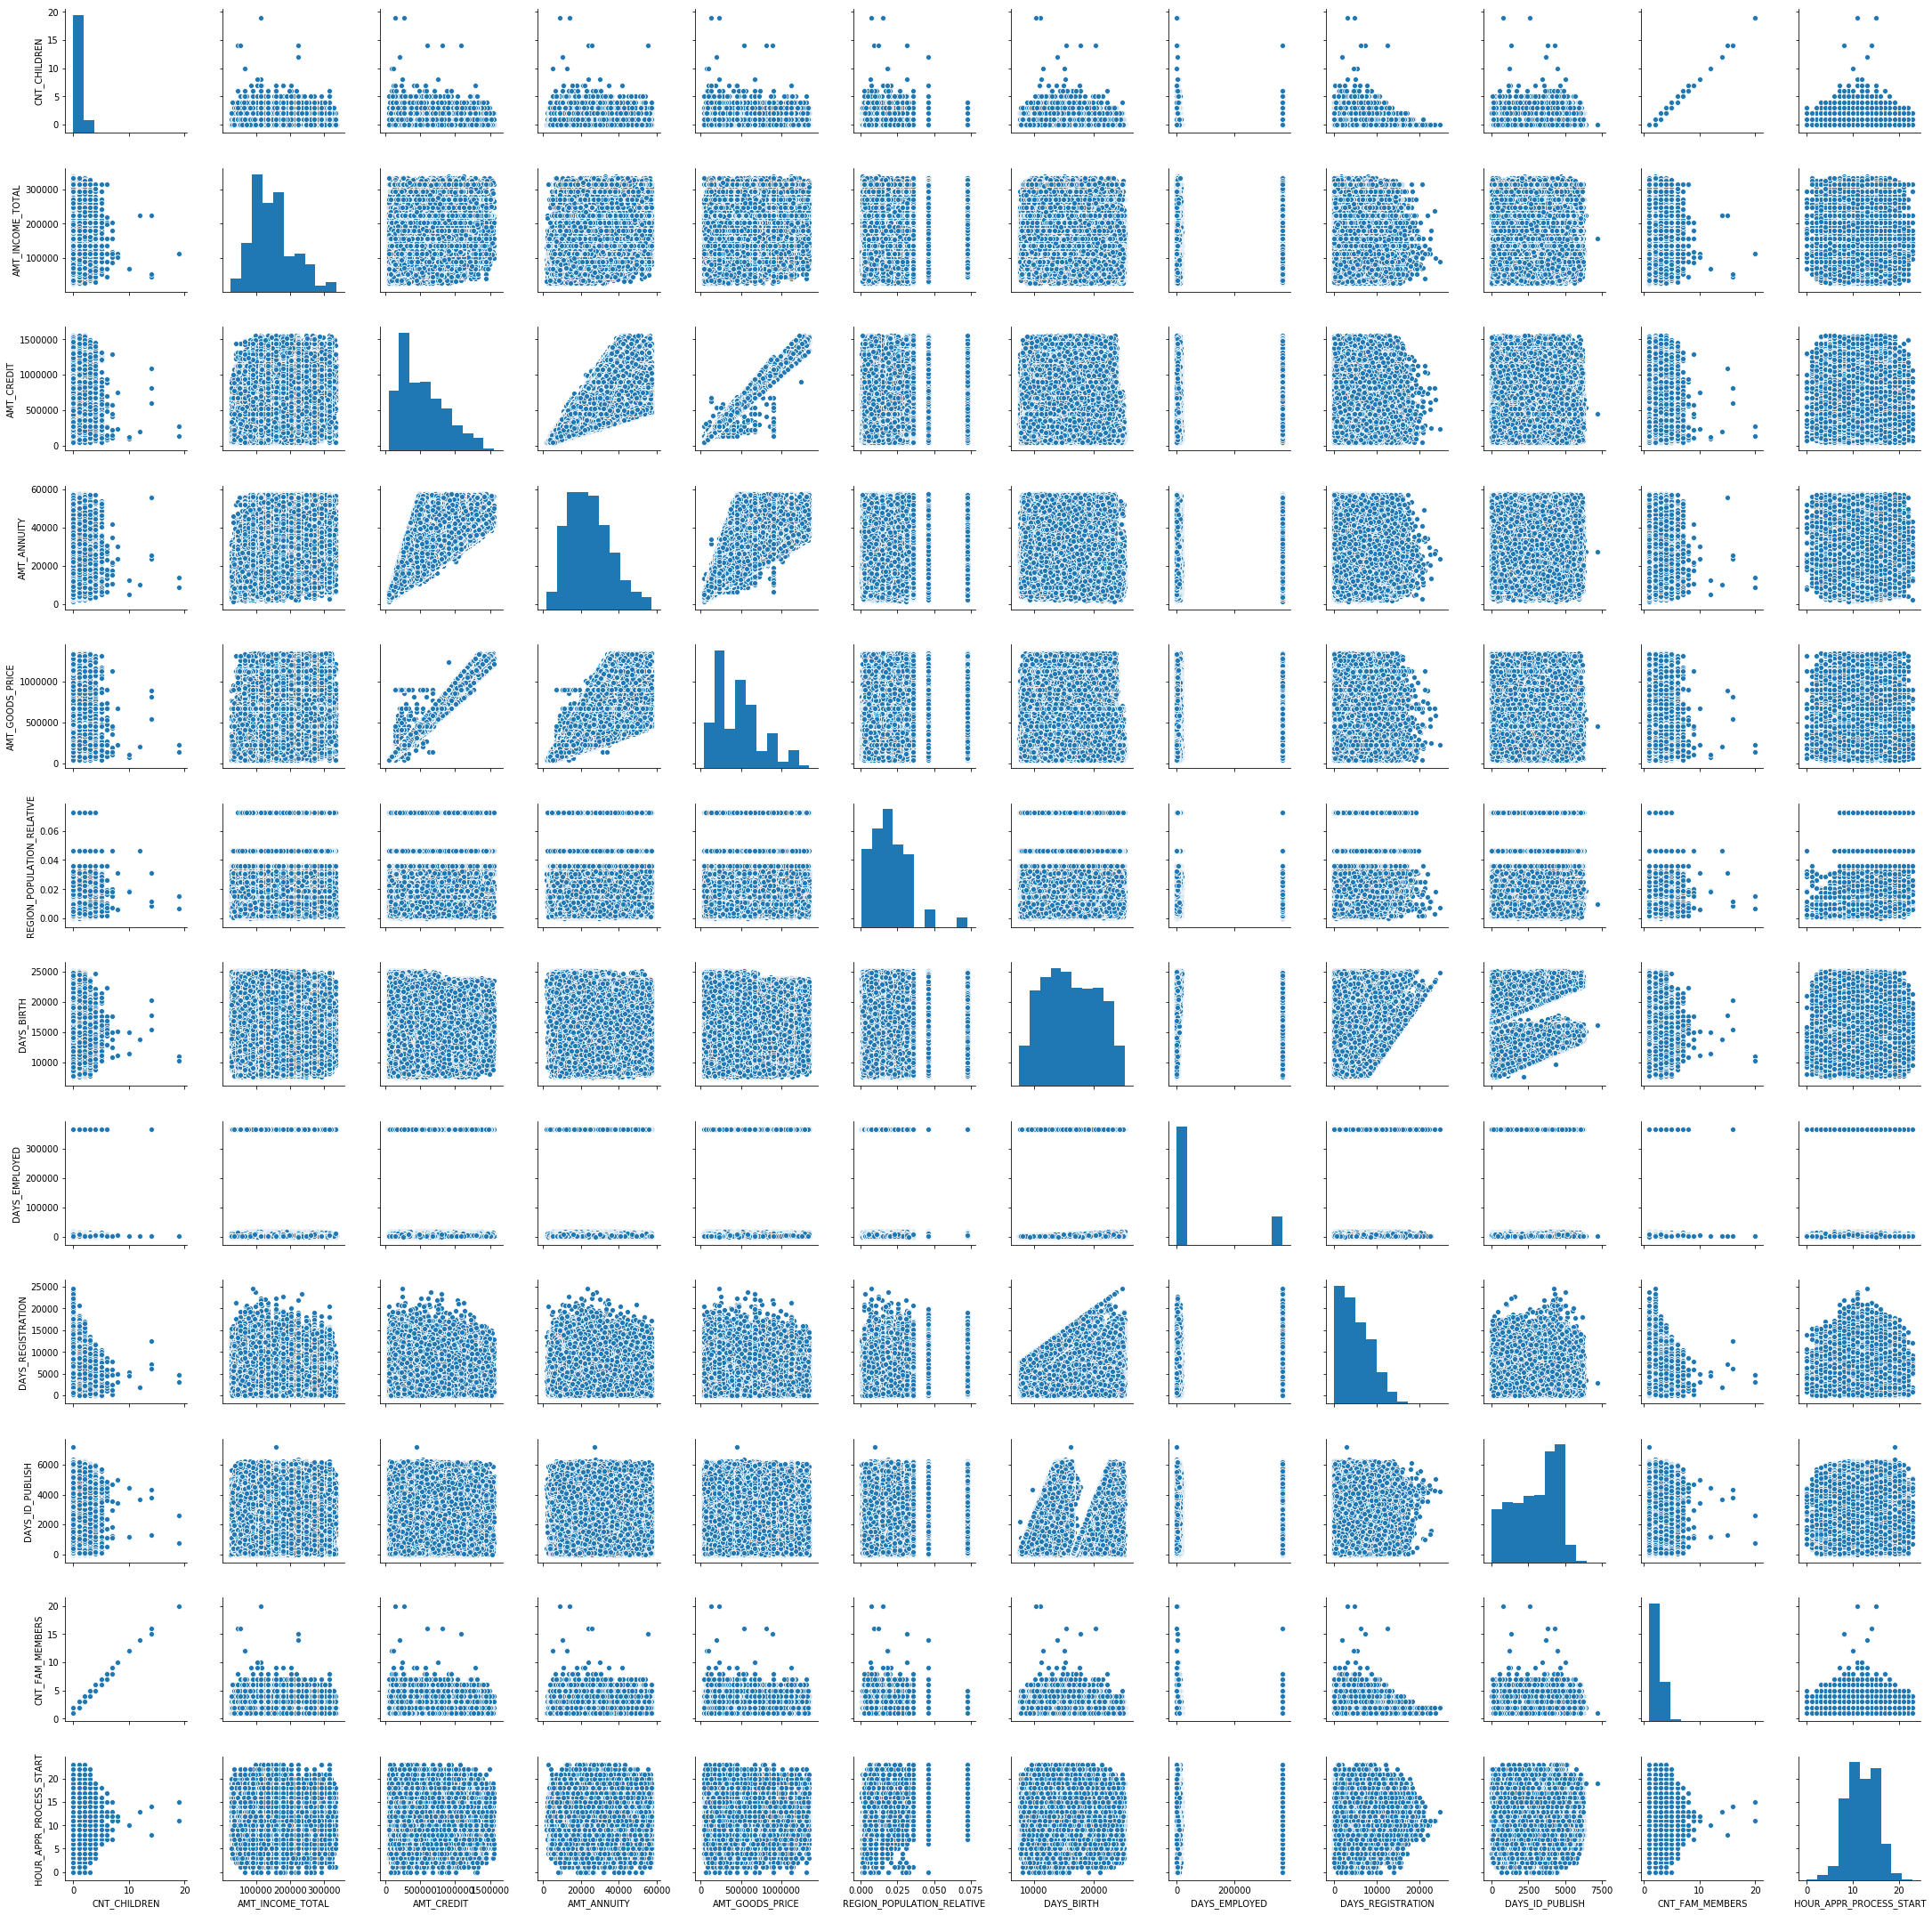

In [92]:
#Bivariate Analysis of numeric variables in target=0
sns.pairplot(target_0df[quant_cols])

###### As we can see in the above graphs, linear pattern is observed for the following in target=0(i.e all other cases):
###### * AMT_CREDIT & AMT_ANNUITY
###### * CNT_FAM_MEMBERS & CNT_CHILDREN
###### * AMT_GOODS_PRICE & AMT_ANNUITY
###### * AMT_CREDIT & AMT_GOODS_PRICE

#### Inference from the analysis of Application_Data
###### Given below are few driver variables which can be used to predict if a customer is likely to default or not.
###### AGE: We have come to this conclusion from our analysis in which we saw that youngsters are more likely to default as the frequency of youngsters is more in target=1 and frequency of senior citizens is more in target=0.
###### AMT_INCOME_TOTAL: We also saw that people with low income ae likely to default more when compared to middle and high income people. But, it is the same case in target=0 also. But, when we look at the scale, people in target=0 have higher values of income compared to target=1.
##### Also, we have seen strong correlation between AMT_CREDIT & AMT_ANNUITY, AMT_ANNUITY & AMT_GOODS_PRICES, AMT_CREDIT & AMT_GOODS_PRICE
##### We can decipher from the above that when people with low income apply for high amount of loan, they are more likely to default as the amt_annuity will be more.
##### DAYS_EMPLOYED: It can be considered as the frequency of people to default more had DAYS_EMPLOYED value 0. This was the same in target=0, but their the higher frequency could mean they are retired or may be pensioners.

### ANALYSIS OF  PREVIOUS_APPLICATION.CSV

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import glob, os
import seaborn as sns

In [2]:
# read data 
previous_app=pd.read_csv("E:\Data Science\Python\Credit EDA Case Study/previous_application.csv")
previous_app.head(5)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

# Data Cleaning

In [3]:

# find out the basic info of the given data
previous_app.info()

# find out the percentage of missing values
previous_app=previous_app.isnull().sum()*100/len(previous_app)
previous_app

# remove columns which have more that 80% missing values
limit=0.80*len(previous_app)
previous_app_missing_removed=previous_app.dropna(thresh=limit, axis=1)
previous_app_missing_removed

# find out the remaining missing values after the removal of 80%
previous_app_missing_removed=previous_app_missing_removed.isnull().sum()*100/len(previous_app_missing_removed)
previous_app_missing_removed

previous_app_missing_removed.head(5)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  \
0           2030495      271877     Consumer loans          17145.0   
1           2802425      108129         Cash loans         607500.0   
2           2523466      122040         Cash loans         112500.0   
3           2819243      176158         Cash loans         450000.0   
4           1784265      202054         Cash loans         337500.0   
5           1383531      199383         Cash loans         315000.0   
6           2315218      175704         Cash loans              0.0   
7           1656711      296299         Cash loans              0.0   
8           2367563      342292         Cash loans              0.0   
9           2579447      334349         Cash loans              0.0   
10          1715995      447712         Cash loans         270000.0   
11          2257824      161140         Cash loans         211500.0   
12          2330894      258628         Cash loans         148500.0   
13          1397919      321676     Consumer loans          53779.5   
14          2273188      270658     Consumer loans          26550.0   
15          1232483      151612     Consumer loans         126490.5   
16          2163253      154602     Consumer loans          26955.0   
17          1285768      142748    Revolving loans         180000.0   
18          2393109      396305         Cash loans         180000.0   
19          1173070      199178         Cash loans          45000.0   
20          1506815      166490         Cash loans         450000.0   
21          1182516      267782         Cash loans         405000.0   
22          1172842      302212         Cash loans              0.0   
23          1172937      302212         Cash loans        1129500.0   
24          1555330      199353         Cash loans              0.0   
25          1543131      275707         Cash loans         229500.0   
26          2536650      338725         Cash loans         369000.0   
27          1676258      433469         Cash loans         247500.0   
28          2075578      418383     Consumer loans          74610.0   
29          1583704      315664         Cash loans              0.0   
...             ...         ...                ...              ...   
1670184     1458393      279524         Cash loans        1575000.0   
1670185     2815037      422867         Cash loans         450000.0   
1670186     1433968      272570         Cash loans              0.0   
1670187     1971628      435554         Cash loans              0.0   
1670188     1713281      247019         Cash loans         900000.0   
1670189     2406354      377114         Cash loans         796500.0   
1670190     2381880      175920         Cash loans              0.0   
1670191     1755809      122569    Revolving loans          45000.0   
1670192     2101747      339383    Revolving loans              0.0   
1670193     1120445      179433    Revolving loans              0.0   
1670194     2101748      280792         Cash loans          90000.0   
1670195     2561520      334654     Consumer loans         248535.0   
1670196     1662123      398290     Consumer loans          57910.5   
1670197     1854636      184353     Consumer loans         153220.5   
1670198     1540903      212968     Consumer loans          22869.0   
1670199     1077969      242303     Consumer loans          37926.0   
1670200     1024416      331038         Cash loans          99000.0   
1670201     1028905      442706     Consumer loans          45450.0   
1670202     2205099      157707     Consumer loans          22207.5   
1670203     2844282      383898     Consumer loans          14791.5   
1670204     1407146      198989         Cash loans         450000.0   
1670205     2815130      338803         Cash loans         135000.0   
1670206     2459206      238591         Cash loans         180000.0   
1670207     1662353      443544         Cash loans         112500.0   
1670208     1556789      209732  

# Univariate Analysis

In [4]:
# lets do univariate analysis to find out the applications that were approved or rejected previous year

# broad category of previous loan application

previous_app_missing_removed['NAME_CONTRACT_TYPE'].value_counts()


Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

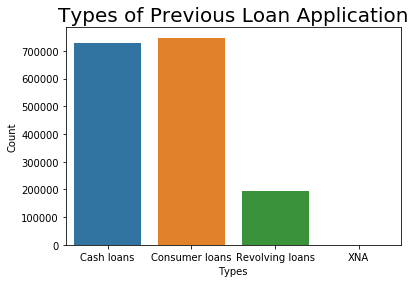

In [5]:
# plot for broad category of previous loan application
plt.figure(figsize=(6, 4))
sns.countplot(previous_app_missing_removed["NAME_CONTRACT_TYPE"])
plt.xticks((0, 1, 2, 3), ["Cash loans", "Consumer loans", "Revolving loans","XNA"])
plt.xlabel("Types")
plt.ylabel("Count")
plt.title("Types of Previous Loan Application", y=1, fontdict={"fontsize": 20});

#this shows consumer and cash loans were higher previous year

In [6]:
# type of client who applied for loan previously
previous_app_missing_removed['NAME_CLIENT_TYPE'].value_counts()


Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

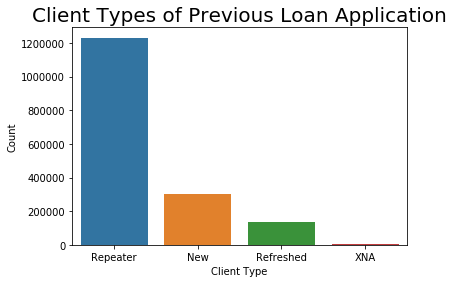

In [7]:
# plot for type of client who applied for loan previously
plt.figure(figsize=(6, 4))
sns.countplot(previous_app_missing_removed["NAME_CLIENT_TYPE"])
plt.xticks((0, 1, 2, 3), ["Repeater", "New", "Refreshed","XNA"])
plt.xlabel("Client Type")
plt.ylabel("Count")
plt.title("Client Types of Previous Loan Application", y=1, fontdict={"fontsize": 20});

# this shows customer are usually repeated and have been banking with the same bank for other loans


In [12]:

#grouping purpose of the loan applied previsouly
Loan_purpose=previous_app_missing_removed.groupby('NAME_CASH_LOAN_PURPOSE').size()
Loan_purpose

#removing the outliers
Loan_purpose_1 = Loan_purpose.drop(Loan_purpose.index[[-1,-2]])
Loan_purpose_1

NAME_CASH_LOAN_PURPOSE
Building a house or an annex         2693
Business development                  426
Buying a garage                       136
Buying a holiday home / land          533
Buying a home                         865
Buying a new car                     1012
Buying a used car                    2888
Car repairs                           797
Education                            1573
Everyday expenses                    2416
Furniture                             749
Gasification / water supply           300
Hobby                                  55
Journey                              1239
Medicine                             2174
Money for a third person               25
Other                               15608
Payments on other loans              1931
Purchase of electronic equipment     1061
Refusal to name the goal               15
Repairs                             23765
Urgent needs                         8412
Wedding / gift / holiday              962
dtype: int6

<function matplotlib.pyplot.show(*args, **kw)>

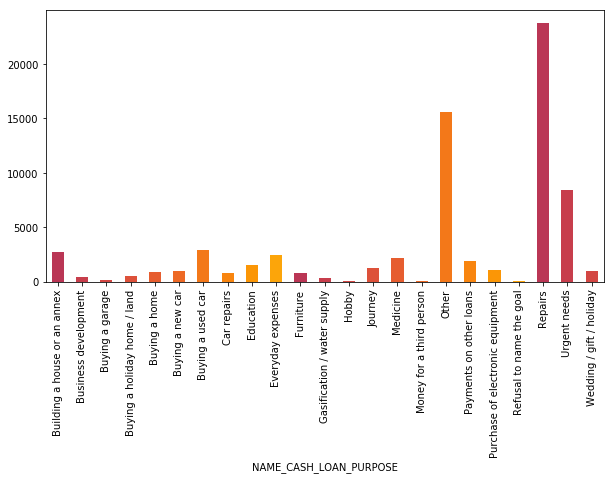

In [13]:
#plot for purpose of loan 
color = cm.inferno_r(np.linspace(.5,.2, 10))
Loan_purpose_1.plot(kind='bar',figsize=(10,5), color=color)
plt.xticks(rotation='vertical')
plt.show


In [14]:
#status of previous loan application
previous_app_missing_removed['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

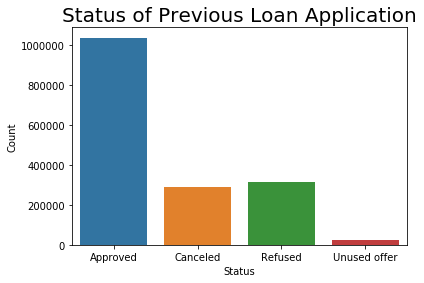

In [15]:
#plot for status of previous loan application
plt.figure(figsize=(6, 4))
sns.countplot(previous_app_missing_removed["NAME_CONTRACT_STATUS"])
plt.xticks((0, 1, 2, 3), ["Approved", "Canceled", "Refused","Unused offer"])
plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Status of Previous Loan Application", y=1, fontdict={"fontsize": 20});

In [16]:
# Categorize NAME_CONTRACT_STATUS into Potential and Defaulters


Approved_count = len(previous_app_missing_removed[previous_app_missing_removed['NAME_CONTRACT_STATUS'] == 'Approved'])
Canceled_count = len(previous_app_missing_removed[previous_app_missing_removed['NAME_CONTRACT_STATUS'] == 'Canceled'])
Unusedoffer_count = len(previous_app_missing_removed[previous_app_missing_removed['NAME_CONTRACT_STATUS'] == 'Unused offer'])
Refused_count = len(previous_app_missing_removed[previous_app_missing_removed['NAME_CONTRACT_STATUS'] == 'Refused'])

Approved_percentage = (Approved_count/len(previous_app_missing_removed['NAME_CONTRACT_STATUS'])) * 100
Canceled_percentage = (Canceled_count/len(previous_app_missing_removed['NAME_CONTRACT_STATUS'])) * 100
Unusedoffer_percentage = (Unusedoffer_count/len(previous_app_missing_removed['NAME_CONTRACT_STATUS'])) * 100
Refused_percentage = (Refused_count/len(previous_app_missing_removed['NAME_CONTRACT_STATUS'])) * 100
print("Approved%",Approved_percentage)
print("Canceled%",Canceled_percentage)
print("Unusedoffer%",Unusedoffer_percentage)
print("Refused%",Refused_percentage)


Approved% 62.074740123121956
Canceled% 18.93883059296593
Unusedoffer% 1.5827911872370846
Refused% 17.403638096675035


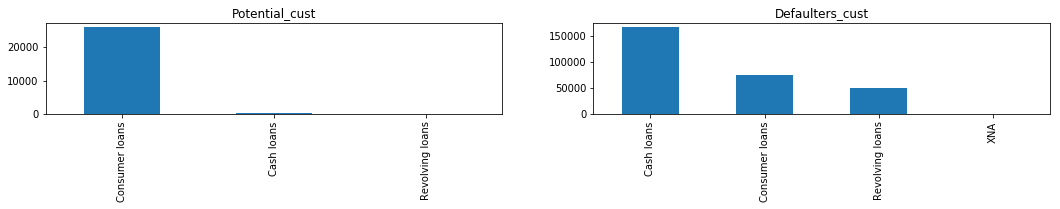

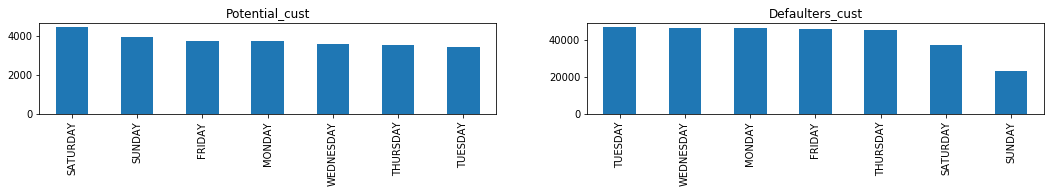

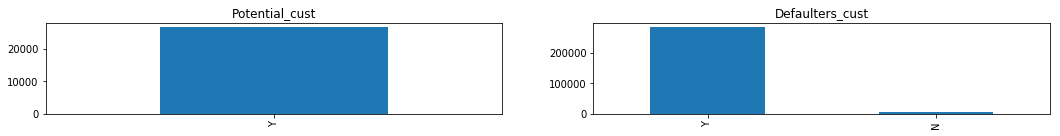

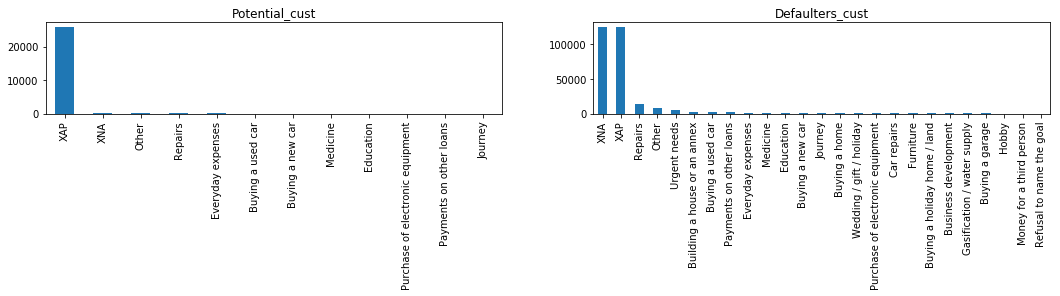

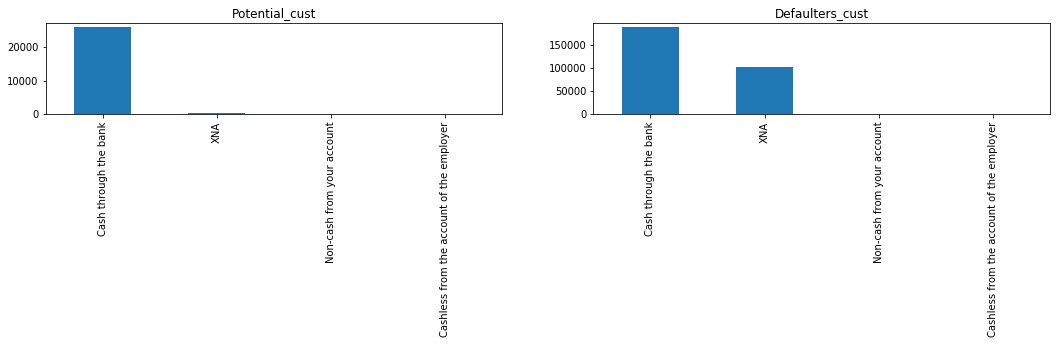

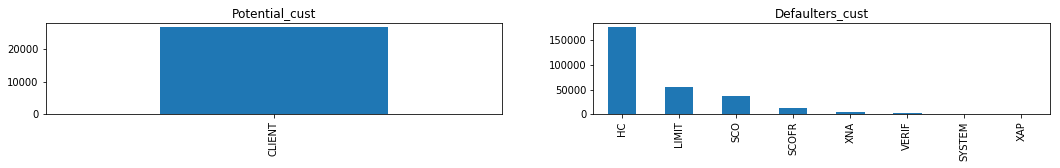

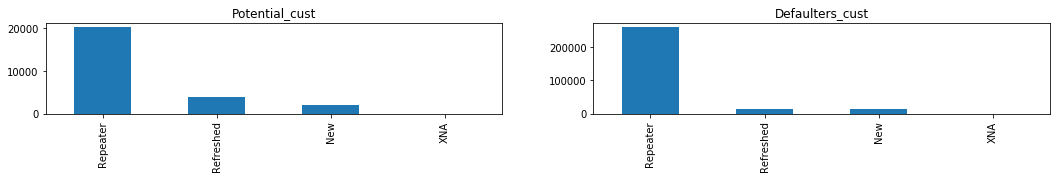

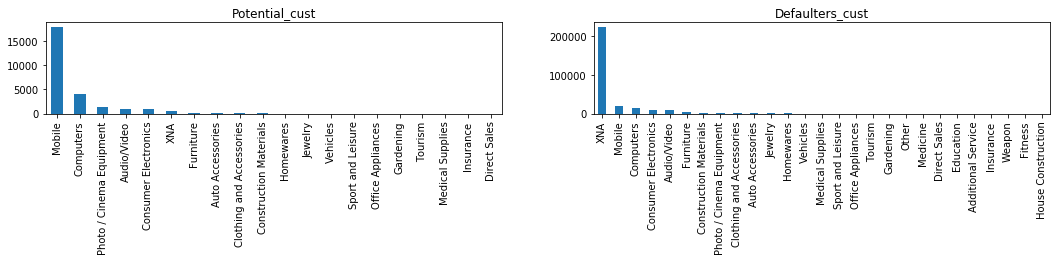

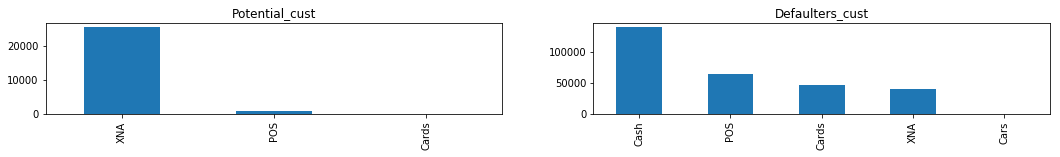

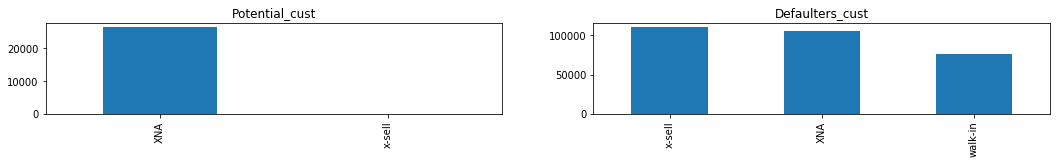

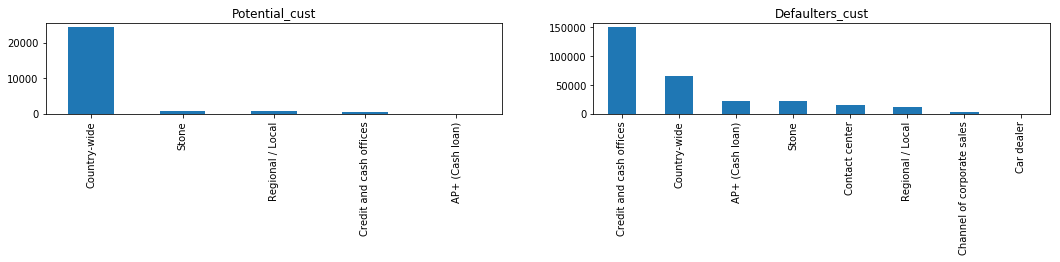

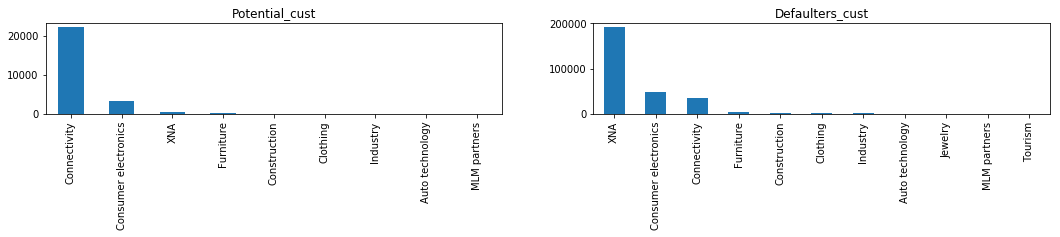

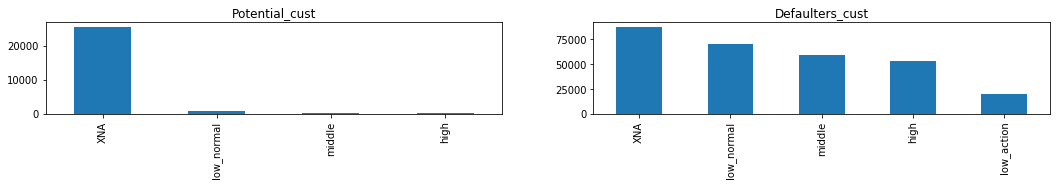

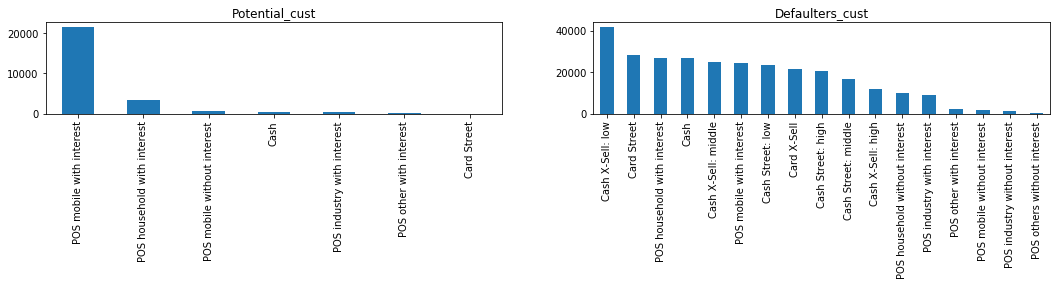

In [19]:
potential_cust=previous_app_missing_removed.loc[previous_app_missing_removed['NAME_CONTRACT_STATUS']=='Approved']
potential_cust=previous_app_missing_removed.loc[previous_app_missing_removed['NAME_CONTRACT_STATUS']=='Canceled']
potential_cust=previous_app_missing_removed.loc[previous_app_missing_removed['NAME_CONTRACT_STATUS']=='Unused offer']
defaulters_cust=previous_app_missing_removed.loc[previous_app_missing_removed['NAME_CONTRACT_STATUS']=='Refused']

#Analysis on Categorical columns

category = previous_app_missing_removed.select_dtypes(include=['object','category']).columns

#Removing NAME_CONTRACT_STATUS column from the list of categorical columns to be analysed

catg_analysis = category.tolist().copy()
catg_analysis.remove('NAME_CONTRACT_STATUS')

pos1=1
pos2=1
i=1
for col in catg_analysis:
    plt.figure(i,figsize=(18,44))
    plt.subplot(22,2,pos1)
    potential_cust[col].value_counts().plot.bar(title='Potential_cust'.format(col))
    pos2=pos1+1
    plt.subplot(22,2,pos2)
    defaulters_cust[col].value_counts().plot.bar(title='Defaulters_cust'.format(col))
    pos1+=2
    i+=1
    plt.show()
#fig.tight_layout()

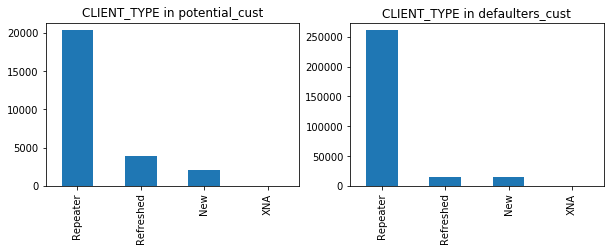

In [20]:
# NAME_CLIENT_TYPE analysis based on Potential and Defaulters

plt.figure(figsize=(10,3))
plt.subplot(121)
potential_cust['NAME_CLIENT_TYPE'].value_counts().plot.bar(title='CLIENT_TYPE in potential_cust')
plt.subplot(122)
defaulters_cust['NAME_CLIENT_TYPE'].value_counts().plot.bar(title='CLIENT_TYPE in defaulters_cust')

# Bivariate Analysis


In [22]:
#Numeric datatypes

numeric_cols = previous_app_missing_removed.select_dtypes([np.number]).columns

#Categorical columns

categ_cols = previous_app_missing_removed.select_dtypes(include=['object','category']).columns

# Converting columns into values

outlier_cols = ['NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE']
get_values = []
for col in outlier_cols:
    tmp_series = previous_app_missing_removed[col].value_counts()
    tmp_series.name = col
    get_values.append(tmp_series)
value_counts = pd.concat(get_values, axis=1, sort=False)
value_counts


NAME_CONTRACT_STATUS  NAME_CLIENT_TYPE
Approved                 1036781.0               NaN
Canceled                  316319.0               NaN
Refused                   290678.0               NaN
Unused offer               26436.0               NaN
Repeater                       NaN         1231261.0
New                            NaN          301363.0
Refreshed                      NaN          135649.0
XNA                            NaN            1941.0

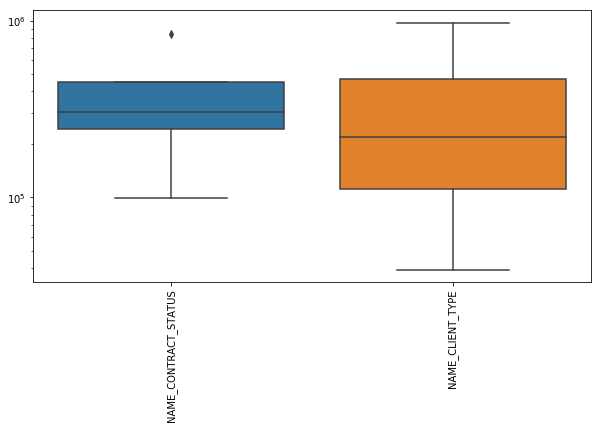

In [24]:
#Capping the outlier values which are above 95% with the value at 95% and values below 5% with value at
#5%

for col in outlier_cols:
    percentiles = value_counts[col].quantile([0.05,0.95]).values
    value_counts.loc[value_counts[col] <= percentiles[0],col] = percentiles[0]
    value_counts.loc[value_counts[col] >= percentiles[1],col] = percentiles[1]
    
    # Box plot for outliers

plt.figure(figsize=(10,5))
sns.boxplot(data=value_counts.loc[:,outlier_cols])
plt.yscale('log')
plt.xticks(rotation='vertical')
plt.autoscale('True')
plt.show()

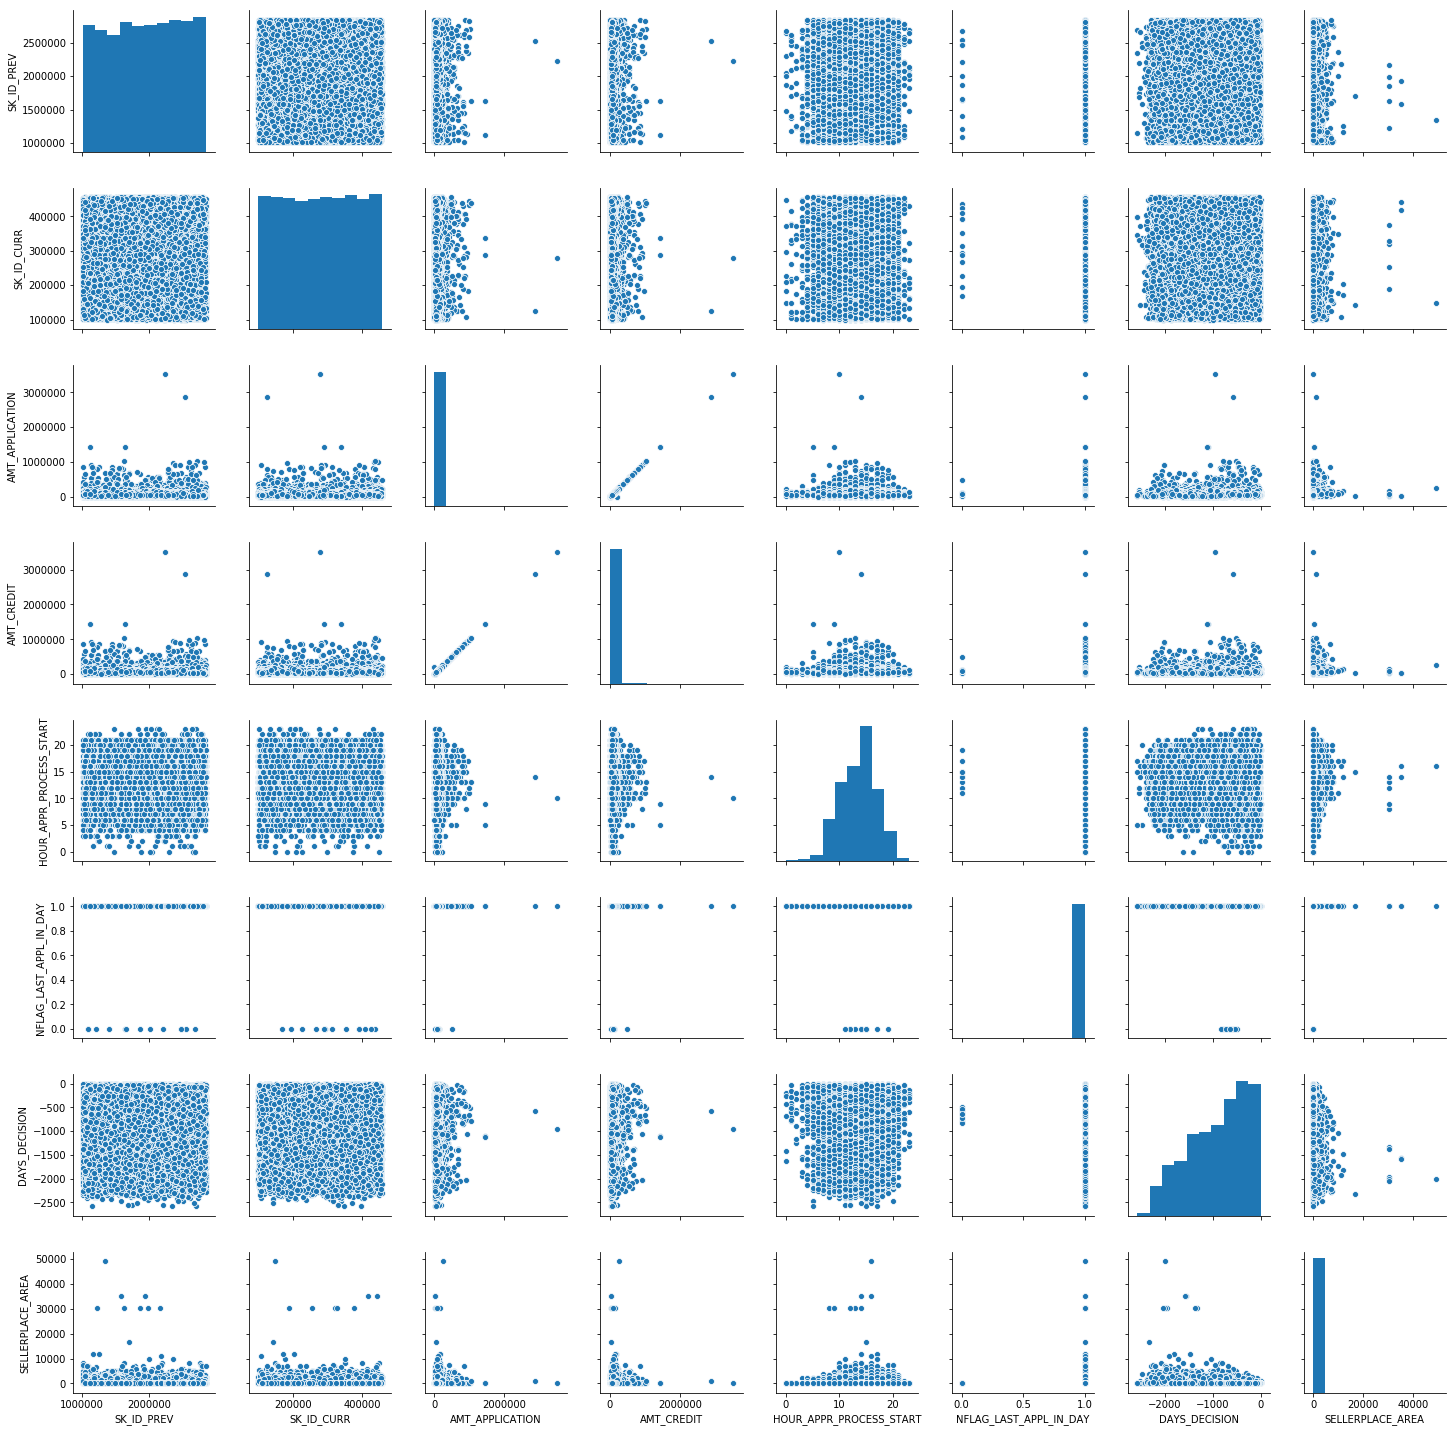

In [26]:
quant_cols = numeric_cols.tolist().copy()
sns.pairplot(potential_cust[quant_cols]) 

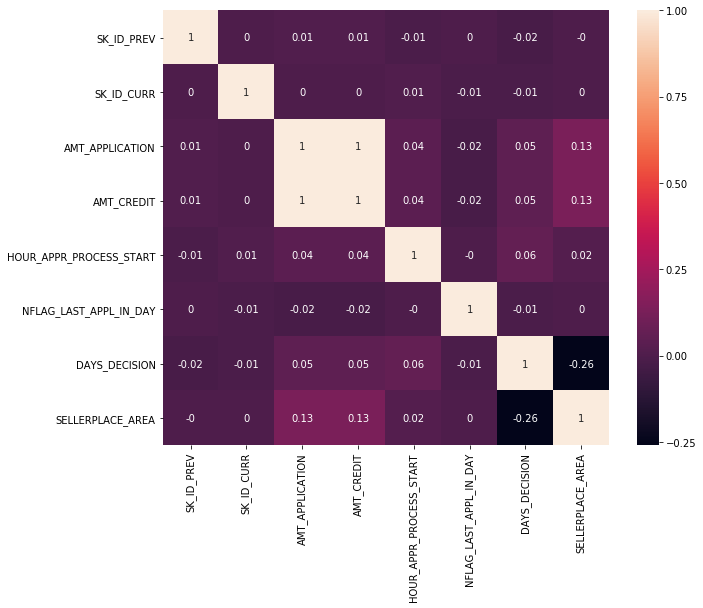

In [27]:
#Correlation for potential customers

plt.figure(figsize=(10,8))
corr = round(potential_cust.corr(),2)
sns.heatmap(corr,annot=True)

 

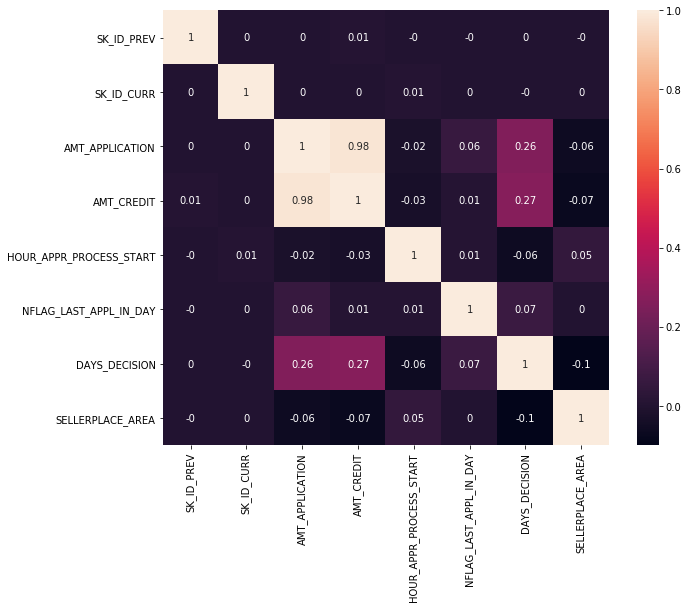

In [28]:
#Correlation for defaulters

plt.figure(figsize=(10,8))
corr = round(defaulters_cust.corr(),2)
sns.heatmap(corr,annot=True)